In [1]:
import mutex as mex
import csv

mutationmatrix = '/Users/jlu96/maf/new/BRCA_wustl/BRCA_wustl-cna-jl.m2'
patientFile = '/Users/jlu96/maf/new/BRCA_wustl/shared_patients.plst'
geneFile = None
minFreq = 0
COSMICFile = '/Users/jlu96/conte/jlu/Analyses/CancerGeneAnalysis/COSMIC/COSMICGenes_OnlyLoss.txt'
closer_than_distance = 10000000

dna_gene_file = '/Users/jlu96/conte/jlu/Analyses/CancerGeneAnalysis/DNADamageRepair_loss.txt'

out_file = '/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/BRCA_wustl-cna-jl-PMM-crossval.csv'
partition_file = '/Users/jlu96/maf/new/BRCA_wustl/BRCA_wustl-cna-jl.ppf'
load_pmm_file = '/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/BRCA_wustl-cna-jl-PMM.txt'
dna_pmm_comparison_file = '/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/BRCA_wustl-cna-jl-PMM-dnacomp.txt'
cluster_matrix = '/Users/jlu96/maf/new/BRCA_wustl/BRCA_wustl-cna-jl-cluster.m2'

numGenes, numCases, genes, patients, geneToCases, patientToGenes = mex.load_mutation_data(mutationmatrix, patientFile, geneFile, minFreq)

if COSMICFile:
    COSMICgenes = set()
    with open(COSMICFile, 'rU') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            COSMICgenes.add(*row)
    print "Number of COSMIC genes ", len(COSMICgenes)
    genes = (set(genes)).intersection(COSMICgenes)
    geneToCases = dict([g for g in geneToCases.items() if g[0] in genes])

print "Num COSMIC genes in this cancer", len(genes)
            


cohort_dict, clusterToProp, min_cohort = load_patient_cohorts(partition_file, patientToGenes)

print clusterToProp.keys()

Not importing the Fortran bipartite_edge_swap bindings in permute.py.


NameError: name 'csv' is not defined

number genes is  525
number patients is  52
Mean is  7073.2
['HEY1loss', 'CD79Bloss', 'KAT6Aloss', 'PPFIBP1loss', 'PRDM1loss', 'HSP90AA1loss', 'NUP214loss', 'TCL1Aloss', 'HOXA9loss', 'USP6loss', 'HMGN2P46loss', 'PMS1loss', 'SETD2loss', 'MDM2loss', 'ZCCHC8loss', 'HNF1Aloss', 'MAP2K2loss', 'FOXO1loss', 'SRSF2loss', 'CNTRLloss', 'CDX2loss', 'LIFRloss', 'SMARCB1loss', 'HLFloss', 'TFRCloss', 'MN1loss', 'SND1loss', 'MYO5Aloss', 'BCL10loss', 'NPM1loss']
Number of genes in cluster 0:  525


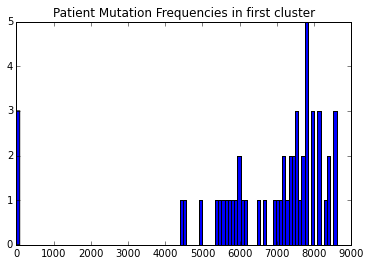

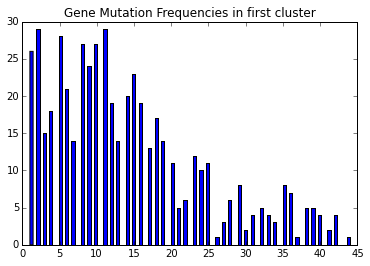

Top gene frequencies are  [44, 42, 42, 42, 42, 41, 41, 40, 40, 40]


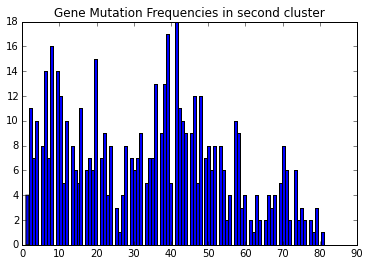

Top gene frequencies are  [81, 79, 79, 79, 78, 77, 77, 76, 76, 75]
numbr of genes used is  55


In [7]:
#let's look at the smallest cluster
c0patients = clusterToProp[0]['Patients']
c1patients = clusterToProp[1]['Patients']

test_minFreq = # SET THIS

c0genes, c0geneToCases, c0patientToGenes = get_cluster_gTC_pTG(geneToCases, patientToGenes, c0patients)
c1genes, c1geneToCases, c1patientToGenes = get_cluster_gTC_pTG(geneToCases, patientToGenes, c1patients)

print "number genes is ", len(c0genes)
print "number patients is ", len(c0patients)
print "Mean is ", clusterToProp[0]['Mean']
print list(c0genes)[0:30]
print "Number of genes in cluster 0: ", len(c0genes)



pfreq = [len(c0patientToGenes[p]) for p in c0patients]
% matplotlib inline
plt.figure()
plt.hist(pfreq, 100)
plt.title("Patient Mutation Frequencies in first cluster")
plt.show()

gfreq = [len(c0geneToCases[g]) for g in c0geneToCases]
% matplotlib inline
plt.figure()
plt.hist(gfreq, 100)
plt.title("Gene Mutation Frequencies in first cluster")
plt.show()

print "Top gene frequencies are ", sorted(gfreq, reverse=True)[0:10]

gfreq = [len(c1geneToCases[g]) for g in c1geneToCases]
% matplotlib inline
plt.figure()
plt.hist(gfreq, 100)
plt.title("Gene Mutation Frequencies in second cluster")
plt.show()

print "Top gene frequencies are ", sorted(gfreq, reverse=True)[0:10]
# let's limit to the genes with at least 

test_genes = [c for c in c0genes if len(c0geneToCases[c]) >= test_minFreq]
print "numbr of genes used is ", len(test_genes)


	MKNK2loss	19	2037465	2051244
    THEGloss 19	361750	376013
    ARID3Aloss 19	925781	975934
    NDUFA6loss CHR_HSCHR22_4_CTG1	42085525	42090965
    OMGloss 17	31272013	31297539

In [8]:
import mutex_triangles as met
import chisquared as chi
import bingenesbypairs as bgbp
compute_mutex = True

cpairfile = '/Users/jlu96/conte/jlu/Analyses/CooccurImprovement/LorenzoModel/Binomial/BRCA_wustl-cna-jl-cpairs-min_cohort.txt'



genepairs = bgbp.getgenepairs(c0geneToCases, test_genes, test_minFreq=test_minFreq, closer_than_distance=closer_than_distance)
print "Number of pairs is ", len(genepairs)

cpairsdict, cgenedict = met.cooccurpairs(numCases, geneToCases, patientToGenes, genepairs, compute_mutex=compute_mutex)

print "number of pairs is ", len(cpairsdict)
cpairsdict = chi.add_BinomP_min_cohort_all_pairs(cpairsdict, geneToCases, patientToGenes, cohort_dict, cohort_dict[0])

print "Writing to file..."

fieldnames = (cpairsdict.values()[0]).keys()
fieldnames.remove('Type')
fieldnames.remove('MutationFrequencies')
fieldnames.remove('MutationFrequencyDifference')
fieldnames.remove('MutationFrequencyDifferenceRatio')
fieldnames.remove('CooccurrenceRatio')
fieldnames.remove('Coverage')
fieldnames.remove('SetScore')
fieldnames.remove('AverageOverlapPMN')
fieldnames.remove('CombinedScore')
fieldnames.remove('Concordance')
fieldnames.remove('Somatic')
fieldnames.remove('RoundedLogPCov')
fieldnames.remove('GeneSet')


met.writeanydict(cpairsdict, cpairfile, fieldnames=fieldnames)

    




hello  frozenset(['USP6loss', 'MAP2K2loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['SMARCB1loss', 'USP6loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['USP6loss', 'MN1loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['USP6loss', 'CHEK2loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['USP6loss', 'EWSR1loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['CDK12loss', 'USP6loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['USP6loss', 'MLLT6loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['FGFR1OPloss', 'USP6loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['GNA11loss', 'USP6loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['CDH1loss', 'USP6loss']) closer_than_distance is  10000000 same seg is  False
hello  frozenset(['USP6loss'

In [11]:
import scipy.stats as stats
print stats.binom.cdf(4, 5, 0.3)
print stats.binom.cdf(4, 5, 0.5)
print stats.binom.cdf(0, 5, 0.5)
print stats.binom.cdf(-1, 5, 0.5)

0.99757
0.96875
0.03125
0.0


In [1]:
# INDEX BY LOSSES
%matplotlib inline
def run_partitions(mutationmatrix = '/Users/jlu96/maf/new/OV_broad/OV_broad-cna-jl.m2',
        patientFile = None, #'/Users/jlu96/maf/new/OV_broad/shared_patients.plst',
        out_file = None, #'/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/OV_broad-cna-jl-PMM-crossval.txt',
        partition_file = None, #'/Users/jlu96/maf/new/OV_broad/OV_broad-cna-jl.ppf',
        load_pmm_file = None, #'/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/OV_broad-cna-jl-PMM.txt',
        dna_pmm_comparison_file = None, #'/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/OV_broad-cna-jl-PMM-dnacomp.txt',
        cluster_matrix = None, # '/Users/jlu96/maf/new/OV_broad/OV_broad-cna-jl-cluster.m2',
        min_cluster_size = 15,
        num_init = 9,
        minComp = 2,
        maxComp = 5,
        do_plot = True,
        do_gmm = False,
        do_dna = False,
        num_integrated = 4,
        do_kmeans = False,
        do_pmm = True,
        do_cross_val = True,
        do_pmm_dna = True,
        do_back_selection = True,
        write_cluster_matrices = True,
        rand_num = 3,
        far_rand_num = 3,
        kf_random_state = 1,
        kf_num_folds = 5,

        geneFile = None,
        minFreq = 0,
        dna_gene_file = '/Users/jlu96/conte/jlu/Analyses/CancerGeneAnalysis/DNADamageRepair_loss.txt',
       out_dir = '/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/',
        write_all_partitions = True):
    
    mutationmatrix_list = mutationmatrix.split('/')
    matrix_dir = '/'.join(mutationmatrix_list[:-1]) + '/'
    prefix = (mutationmatrix_list[-1]).split('.m2')[0]
    

    if not patientFile:
        patientFile = matrix_dir + 'shared_patients.plst'
        
    if not out_file:
        if do_cross_val:
            out_file = out_dir + prefix + '-PMM-crossval-kf' + str(kf_num_folds) + '.txt'
        else:
            out_file = out_dir + prefix + '-PMM-comparisons.txt'
    
    if not partition_file:
        partition_file = matrix_dir + prefix + '.ppf'
        
    
    if not load_pmm_file:
        load_pmm_file = out_dir + prefix + '-PMM.txt'
    
    if not dna_pmm_comparison_file:
        dna_pmm_comparison_file = out_dir + prefix + '-PMM-dnacomp.txt'
        
    if not cluster_matrix:
        cluster_matrix = matrix_dir + prefix + '-cluster.m2'

    
    numGenes, numCases, genes, patients, geneToCases, patientToGenes = mex.load_mutation_data(mutationmatrix, patientFile, geneFile, minFreq)

    p_gene_list = []

    with open(dna_gene_file, 'rU') as row_file:
        reader = csv.reader(row_file, delimiter='\t')
        for row in reader:
            p_gene_list.append(row[0])
        dna_cohort_dict = partition_gene_list(patientToGenes, p_gene_list, binary=not bool(num_integrated))


    if do_kmeans:
        datas = []
        for i in np.arange(minComp, maxComp, 1):
            datas.append(partition_gene_kmeans(geneToCases, patientToGenes, p_gene_list, i, num_bins=50, title=None, do_plot=True))

        with open(out_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=datas[0].keys())
            writer.writeheader()
            for row in datas:
                writer.writerow(row)


    if do_dna:
        cohort_dict = partition_gene_list(patientToGenes, p_gene_list, binary=not bool(num_integrated))
        # Make new cohorts over this
        if num_integrated:
            cohort_dict = integrate_cohorts(cohort_dict, numCases, num_integrated)


        cohort_pairings = [(key, cohort_dict[key]) for key in cohort_dict]
        draw_partitions_cohorts(geneToCases, patientToGenes, cohort_pairings, title='DNADamageGenes',
                        num_bins=100 if mutationmatrix[-9:] == 'cna-jl.m2' else 50)


    if do_gmm:
        datas = []
        for i in np.arange(minComp, maxComp, 1):
            datas.append(partition_GMM(patientToGenes, i, num_bins=50, title='GMM size ' + str(i), do_plot=do_plot))

        with open(out_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=datas[0].keys())
            writer.writeheader()
            for row in datas:
                writer.writerow(row)


    if do_pmm:
        datas = []
        clusters = []

        partition_stats_list = []
        for num_components in np.arange(minComp, maxComp, 1):
            best_data, clusterToPatient = best_pmm(patientToGenes, num_components, rand_num=rand_num, far_rand_num=far_rand_num,
                                                   min_cluster_size=min_cluster_size)

            if do_back_selection:
                # assign the missing data
                clusterToPatient = assign_missing(clusterToPatient, patientToGenes)
                best_data, clusterToPatient = backward_selection(best_data, clusterToPatient, patientToGenes, min_cluster_size = min_cluster_size,
                       max_components = maxComp)
            
            if do_pmm_dna:
                print "cfirst lasses are ", best_data['Classes'], "clusterToPatient is ", clusterToPatient.keys()
                pmm = PMM(lam=best_data['Means'], p_k=best_data['Probabilities'], patientToGenes=patientToGenes,
                         data=best_data, clusterToPatient=clusterToPatient, classes=best_data['Classes'],
                          do_fit=False)

                partition_stats_list.extend(pmm.compare_dna(dna_cohort_dict))

                best_data = pmm.data


            if do_cross_val:
            #cross validate each of the components
                print "*******************************************************************************************************"
                print "BEGINNING CROSS VALIDATION for ", num_components
                print "*******************************************************************************************************"
                best_data['TestLL'], best_data['TestMissing'], best_data['TestBIC'] = pmm_cross_validate(num_components, patientToGenes,
                                                                                                         num_folds=kf_num_folds,
                                                                                                     kf_random_state=kf_random_state,
                                                                                   rand_num=rand_num, far_rand_num=far_rand_num,
                                                                                   min_cluster_size=min_cluster_size)
                best_data['TestFolds'] = kf_num_folds

                print "*******************************************************************************************************"
                print "EMDING CROSS VALIDATION  for ", num_components
                print "*******************************************************************************************************"

            datas.append(best_data)
            clusters.append(clusterToPatient)
            
            if write_all_partitions:
                with open(partition_file + str(num_components), 'w') as csvfile:
                    writer = csv.writer(csvfile, delimiter='\t')

                    writer.writerow(['Likelihood', best_data['Likelihood']])
                    writer.writerow(['BIC', best_data['BIC']])
                    writer.writerow(['NumComponents', best_data['Number']])
                    writer.writerow(['Cluster', 'Mean', 'Probability', 'Patients'])
                    if 'Merged' in best_data and best_data['Merged']:
                        for k in range(len(clusterToPatient)):
                            lam = best_data['Means'][k]
                            p_k = best_data['Probabilities'][k]
                            writer.writerow([best_data['Classes'][k] , lam, p_k]  + list(clusterToPatient[best_data['Classes'][k]]))
                        
                    else:
                        for k in clusterToPatient:
                            if k != -1:
                                lam = best_data['Means'][k]
                                p_k = best_data['Probabilities'][k]
                            else:
                                lam = None
                                p_k = None
                            writer.writerow([k, lam, p_k] + list(clusterToPatient[k]))

        # get the best BIC
        combined = zip(datas, clusters)
        if do_cross_val:
            combined = sorted(combined, key=lambda entry: ( -1 * entry[0]['MoreThanMin'], np.round(entry[0]['TestMissing']), -1 * entry[0]['TestLL'], entry[0]['TestBIC'], entry[0]['BIC']))
        else:
            combined = sorted(combined, key=lambda entry: ( -1 * entry[0]['MoreThanMin'], entry[0]['BIC']))

        datas, clusters = zip(*combined)




        with open(out_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=datas[-1].keys(), delimiter='\t', extrasaction='ignore')
            print datas
            writer.writeheader()
            for row in datas:
                writer.writerow(row)


        best_data = datas[0]
        clusterToPatient = clusters[0]

        # code to parition by best clusters
        with open(partition_file, 'w') as csvfile:
            writer = csv.writer(csvfile, delimiter='\t')

            writer.writerow(['Likelihood', best_data['Likelihood']])
            writer.writerow(['BIC', best_data['BIC']])
            writer.writerow(['NumComponents', best_data['Number']])
            writer.writerow(['Cluster', 'Mean', 'Probability', 'Patients'])
            if 'Merged' in best_data and best_data['Merged']:
                for k in range(len(clusterToPatient)):
                    lam = best_data['Means'][k]
                    p_k = best_data['Probabilities'][k]
                    writer.writerow([best_data['Classes'][k] , lam, p_k]  + list(clusterToPatient[best_data['Classes'][k]]))
                        
            else:
                for k in clusterToPatient:
                    if k != -1:
                        lam = best_data['Means'][k]
                        p_k = best_data['Probabilities'][k]
                    else:
                        lam = None
                        p_k = None
                    writer.writerow([k, lam, p_k] + list(clusterToPatient[k]))

        if write_cluster_matrices:
            for cluster in clusterToPatient:
                with open(cluster_matrix + str(cluster), 'w') as csvfile:
                    writer = csv.writer(csvfile, delimiter='\t')
                    for patient in clusterToPatient[cluster]:
                        writer.writerow('\t'.join([patient] + list(patientToGenes[patient])))


        if do_pmm_dna:
            with open(dna_pmm_comparison_file, 'w') as csvfile:
                writer = csv.DictWriter(csvfile, fieldnames=partition_stats_list[0].keys(), delimiter='\t')
                writer.writeheader()
                print "header written"
                for row in partition_stats_list:
                    writer.writerow(row)


Initial Lambda is  [7942.3333333333339, 10244.0]
Initial p_k is [0.5, 0.5]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:746: RuntimeWarning: divide by zero encountered in log


ll_new is  -9513.88022894 missing is  10
ll_new is  -9464.84959313 missing is  8
ll_new is  -9113.62468321 missing is  8
ll_new is  -9024.72708705 missing is  8
ll_new is  -9024.72708705 missing is  8


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:646: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:577: RuntimeWarning: divide by zero encountered in log


LL: -9025.0 Missing patients:  8
LL: -9025.0 Missing patients:  8
LL: -9025.0 Missing patients:  8
LL: -9025.0 Missing patients:  8
LL: -9025.0 Missing patients:  8
LL: -9025.0 Missing patients:  8
LL: -9025.0 Missing patients:  8
LL: -18808.0 Missing patients:  16
LL: -9025.0 Missing patients:  8
LL: -9025.0 Missing patients:  8
LL: -9025.0 Missing patients:  8


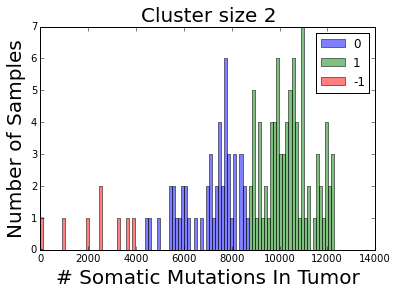

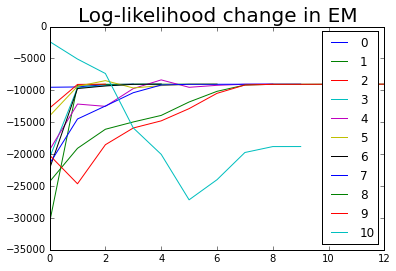

[(7073.163265306122, 0), (10436.33734939759, 1)] 7073.16326531
cfirst lasses are  [0, 1] clusterToPatient is  [0, 1]
Class is  [0, 1] Keys are  [0, 1]
In partition stats Class is  [0, 1] Keys are  [0, 1]


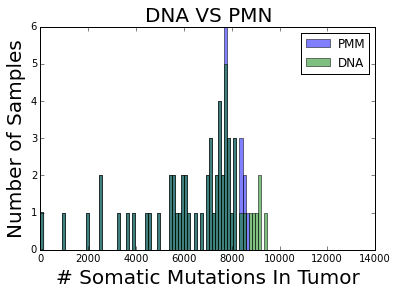

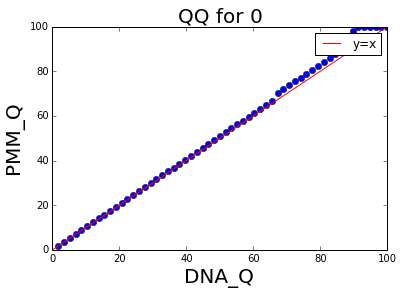

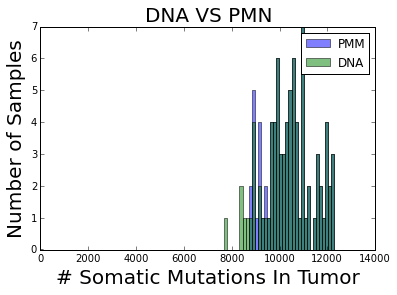

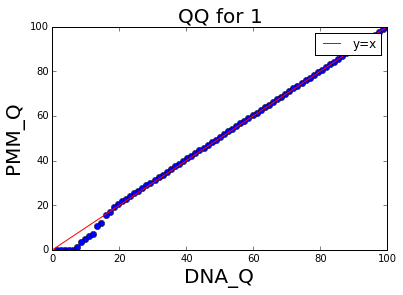

Number agreements  129
Total  140
Prob agreements  0.515918367347
Cohen kappa  0.837689713322
Initial Lambda is  [7531.5, 9334.5, 10530.5]
Initial p_k is [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
ll_new is  -7886.75220302 missing is  8
ll_new is  -6065.33379915 missing is  8
ll_new is  -5909.13384058 missing is  8
ll_new is  -6644.7517862 missing is  7
ll_new is  -6584.23250991 missing is  7
ll_new is  -6580.09914163 missing is  7
ll_new is  -6576.22913947 missing is  7
ll_new is  -6574.21778959 missing is  7
ll_new is  -6566.4116497 missing is  7
ll_new is  -6484.53546157 missing is  7
ll_new is  -7071.05245018 missing is  6
ll_new is  -6725.04675564 missing is  6
ll_new is  -7050.18896826 missing is  5
ll_new is  -6520.22953207 missing is  5
ll_new is  -6161.10030977 missing is  5
ll_new is  -6123.04211316 missing is  5
ll_new is  -6118.06383336 missing is  5
ll_new is  -6118.06382006 missing is  5
LL: -6118.0 Missing patients:  5
LL: -6118.0 Missing patients:  5
L

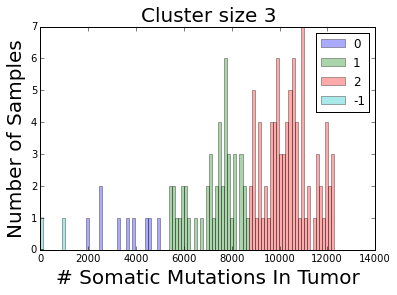

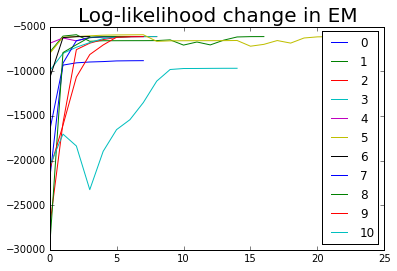

[(3508.777777777778, 0), (7232.217391304348, 1), (10436.33734939759, 2)] 3508.77777778
****************************************
Begin merging.


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:946: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:957: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:966: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1002: RuntimeWarning: divide by zero encountered in log


Possible merged clusters is  [[(0, 1), 6, nan, True, True], [(2, 1), 28, -22804.580983861913, True, False], [(1, 0), 37, -3730.019026518582, False, False], [(1, 2), 13, -11917.500861313676, False, False]]
Best cluster is  [(0, 1), 6, nan, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([ 2767.8,  9770.6,  9024.8])), ('Initial p_k', array([ 0.44,  0.5 ,  0.07])), ('Initial LL', -16720.0), ('Number', 3), ('OriginalNumber', 3), ('Means', [[3508.8000000000002], [7232.1999999999998, 3508.8000000000002], 10436.299999999999]), ('Probabilities', [[0.070000000000000007], [0.33000000000000002, 0.070000000000000007], 0.59999999999999998]), ('Likelihood', -8814.0), ('Classes', [0, 1, 2]), ('AIC', 17641.0), ('BIC', 17658.0), ('Missing', 2), ('MinClusterSize', 9), ('MoreThanMin', 0), ('Merged', False), ('MergeHistory', set([('[3508.8000000000002, 7232.1999999999998]', '[0.070000000000000007, 0.33000000000000002]', (11, 46), 6, nan, ('Nu

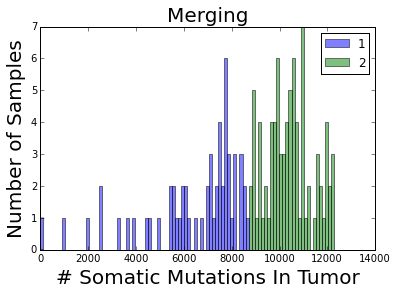

End merging.
****************************************
cfirst lasses are  [1, 2] clusterToPatient is  [1, 2]
Class is  [1, 2] Keys are  [1, 2]
In partition stats Class is  [1, 2] Keys are  [1, 2]


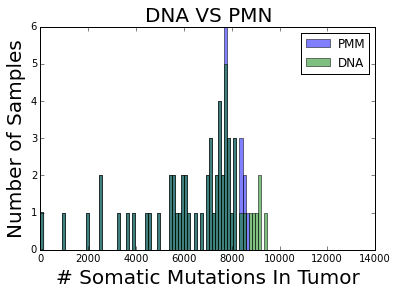

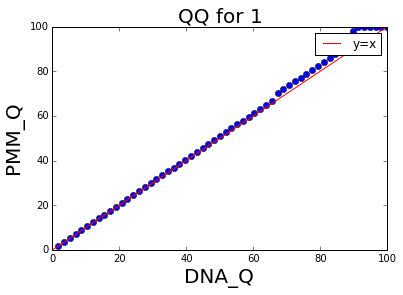

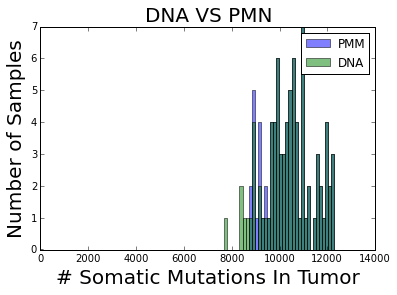

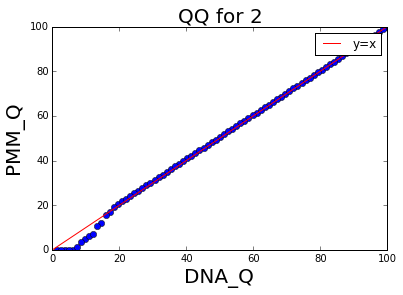

Number agreements  129
Total  140
Prob agreements  0.515918367347
Cohen kappa  0.837689713322
Initial Lambda is  [7153.3999999999996, 8592.2000000000007, 9934.0, 10735.6]
Initial p_k is [0.25, 0.25, 0.25, 0.25]
ll_new is  -5918.1427637 missing is  8
ll_new is  -5334.06185403 missing is  7
ll_new is  -5277.91561376 missing is  6
ll_new is  -5086.8377964 missing is  5
ll_new is  -4508.19892673 missing is  5
ll_new is  -4380.83605576 missing is  5
ll_new is  -4342.35184322 missing is  5
ll_new is  -4283.44463225 missing is  5
ll_new is  -4255.04177655 missing is  5
ll_new is  -4251.14862615 missing is  5
ll_new is  -4248.95574886 missing is  5
ll_new is  -4247.33809897 missing is  5
ll_new is  -4246.33980953 missing is  5
ll_new is  -4245.84602934 missing is  5
ll_new is  -4245.76742553 missing is  5
ll_new is  -4245.75698809 missing is  5
ll_new is  -4245.75519603 missing is  5
LL: -4246.0 Missing patients:  5
LL: -4246.0 Missing patients:  5
LL: -4246.0 Missing patients:  5
LL: -5496.0 

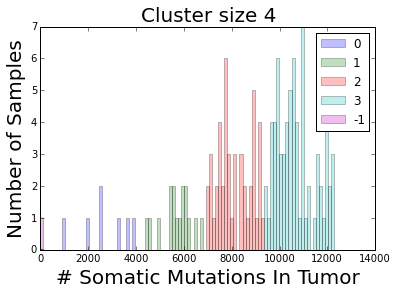

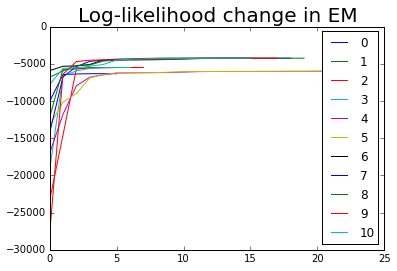

[(2660.1428571428573, 0), (5676.75, 1), (8104.54347826087, 2), (10702.342857142858, 3)] 2660.14285714
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 4, nan, False, True], [(1, 0), 14, -764.79392082578761, False, True], [(1, 2), 2, -4828.1648906798146, False, True], [(2, 1), 11, -12390.361274072797, True, False], [(3, 2), 10, -18638.880144736842, True, False], [(2, 3), 1, -15158.714690247158, False, False]]
Best cluster is  [(0, 1), 4, nan, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  2006.7,   6834.1,  11096.7,   7566.9])), ('Initial p_k', array([ 0.33,  0.29,  0.06,  0.32])), ('Initial LL', -10057.0), ('Number', 4), ('OriginalNumber', 4), ('Means', [[2660.0999999999999], [5676.8000000000002, 2660.0999999999999], 8104.5, 10702.299999999999]), ('Probabilities', [[0.050000000000000003], [0.12, 0.050000000000000003], 0.33000000000000002, 0.5]), ('Likelihood', -6329.0), ('

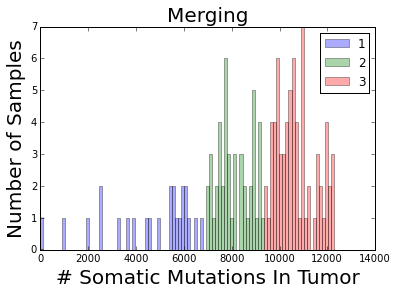

End merging.
****************************************
****************************************
Begin merging.


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:944: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1000: RuntimeWarning: divide by zero encountered in log


Possible merged clusters is  [[(0, 1), 9, nan, False, True], [(1, 0), 11, -12390.361274072797, True, False], [(2, 1), 10, -18638.880144736842, True, False], [(1, 2), 1, -15158.714690247158, False, False]]
Best cluster is  [(0, 1), 9, nan, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  6834.1,  11096.7,   7566.9])), ('Initial p_k', array([ 0.29,  0.06,  0.32])), ('Initial LL', -10057.0), ('Number', 3), ('OriginalNumber', 4), ('Means', [[5676.8000000000002, 2660.0999999999999], [8104.5, 5676.8000000000002, 2660.0999999999999], 10702.299999999999]), ('Probabilities', [[0.12, 0.050000000000000003], [0.33000000000000002, 0.12, 0.050000000000000003], 0.5]), ('Likelihood', -6329.0), ('Classes', [1, 2, 3]), ('AIC', 12675.0), ('BIC', 12698.0), ('Missing', 1), ('MinClusterSize', 24), ('MoreThanMin', 0), ('Merged', True), ('MergeHistory', set([('[2660.0999999999999, 5676.8000000000002]', '[0.050000000000000003, 0.12]', (8, 16), 

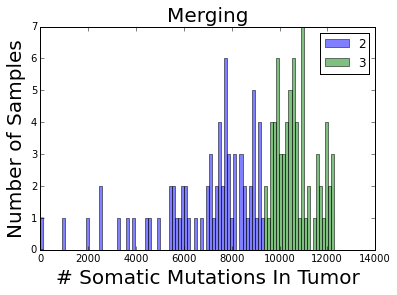

End merging.
****************************************
cfirst lasses are  [2, 3] clusterToPatient is  [2, 3]
Class is  [2, 3] Keys are  [2, 3]
In partition stats Class is  [2, 3] Keys are  [2, 3]


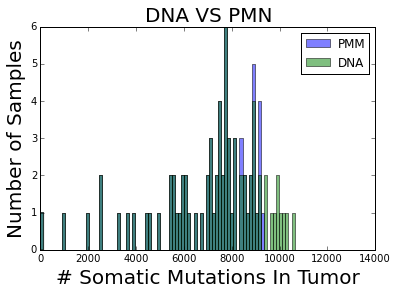

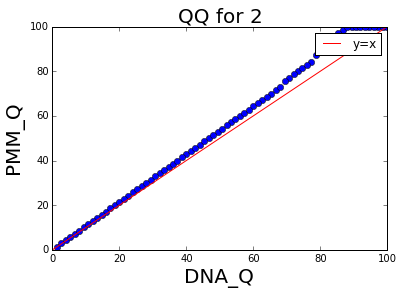

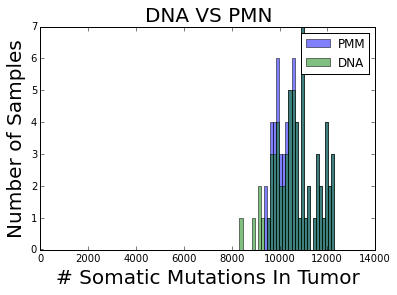

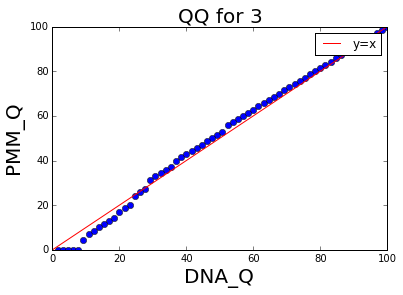

Number agreements  125
Total  140
Prob agreements  0.5
Cohen kappa  0.785714285714
Initial Lambda is  [6750.5, 7942.3333333333339, 9334.5, 10244.0, 10929.5]
Initial p_k is [0.2, 0.2, 0.2, 0.2, 0.2]
ll_new is  -5053.45758914 missing is  7
ll_new is  -4411.22810914 missing is  5
ll_new is  -3503.60422724 missing is  5
ll_new is  -3434.81074035 missing is  5
ll_new is  -3397.2169116 missing is  5
ll_new is  -3382.56088479 missing is  5
ll_new is  -3367.35068108 missing is  5
ll_new is  -3362.34958351 missing is  5
ll_new is  -3362.17673064 missing is  5
ll_new is  -3362.1761602 missing is  5
LL: -3362.0 Missing patients:  5
LL: -3366.0 Missing patients:  5
LL: -3394.0 Missing patients:  5
LL: -3366.0 Missing patients:  5
LL: -3366.0 Missing patients:  5
LL: -3398.0 Missing patients:  5
LL: -5506.0 Missing patients:  1
LL: -4528.0 Missing patients:  1
LL: -5506.0 Missing patients:  1
**********NO PATIENTS IN CLUSTER  3508.77777778 0.0642857142857
LL: -8832.0 Missing patients:  0
LL: -5499.

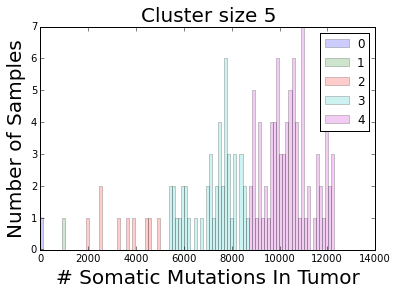

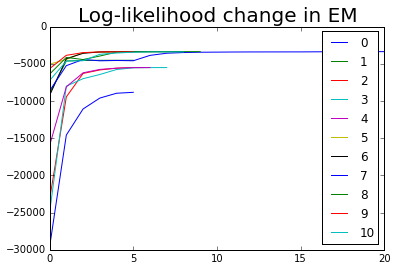

No missing patients in clusters
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 1, 0, True, True], [(1, 2), 1, 0, True, True], [(2, 3), 6, -1109.4743615703505, True, True], [(1, 0), 1, 0, False, True], [(2, 1), 8, -60.368815358821848, False, True], [(4, 3), 28, -22803.65659235455, True, False], [(3, 2), 37, -3731.4063826370266, False, False], [(3, 4), 13, -11918.055496218121, False, False]]
Best cluster is  [(0, 1), 1, 0, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([ 6835.3,  7562.4,   698.9,    53.1,  2014.8])), ('Initial p_k', array([ 0.2 ,  0.3 ,  0.14,  0.16,  0.21])), ('Initial LL', -29627.0), ('Number', 5), ('OriginalNumber', 5), ('Means', [[5.0], [945.0, 5.0], 3508.8000000000002, 7232.1999999999998, 10436.299999999999]), ('Probabilities', [[0.01], [0.01, 0.01], 0.059999999999999998, 0.33000000000000002, 0.58999999999999997]), ('Likelihood', -8832.0), ('Classes', [0,

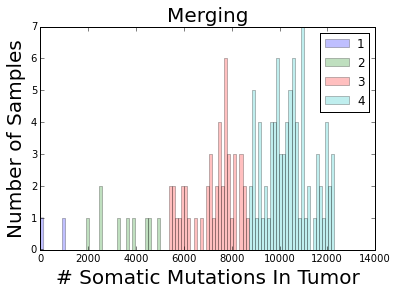

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 2, 0, True, True], [(1, 2), 6, -1109.4743615703505, True, True], [(1, 0), 8, -60.368815358821848, False, True], [(3, 2), 28, -22803.65659235455, True, False], [(2, 1), 37, -3731.4063826370266, False, False], [(2, 3), 13, -11918.055496218121, False, False]]
Best cluster is  [(0, 1), 2, 0, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([ 7562.4,   698.9,    53.1,  2014.8])), ('Initial p_k', array([ 0.3 ,  0.14,  0.16,  0.21])), ('Initial LL', -29627.0), ('Number', 4), ('OriginalNumber', 5), ('Means', [[945.0, 5.0], [3508.8000000000002, 945.0, 5.0], 7232.1999999999998, 10436.299999999999]), ('Probabilities', [[0.01, 0.01], [0.059999999999999998, 0.01, 0.01], 0.33000000000000002, 0.58999999999999997]), ('Likelihood', -8832.0), ('Classes', [1, 2, 3, 4]), ('AIC', 17684.0), ('BIC', 

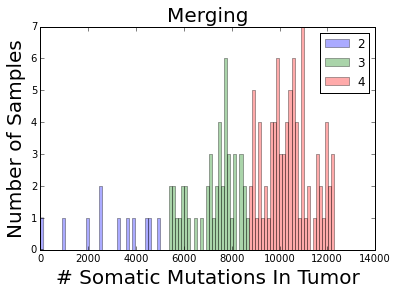

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 8, -1109.4743615703505, True, True], [(2, 1), 28, -22803.65659235455, True, False], [(1, 0), 37, -3731.4063826370266, False, False], [(1, 2), 13, -11918.055496218121, False, False]]
Best cluster is  [(0, 1), 8, -1109.4743615703505, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  698.9,    53.1,  2014.8])), ('Initial p_k', array([ 0.14,  0.16,  0.21])), ('Initial LL', -29627.0), ('Number', 3), ('OriginalNumber', 5), ('Means', [[3508.8000000000002, 945.0, 5.0], [7232.1999999999998, 3508.8000000000002, 945.0, 5.0], 10436.299999999999]), ('Probabilities', [[0.059999999999999998, 0.01, 0.01], [0.33000000000000002, 0.059999999999999998, 0.01, 0.01], 0.58999999999999997]), ('Likelihood', -8832.0), ('Classes', [2, 3, 4]), ('AIC', 17684.0), ('BIC', 17714.0), ('Missing', 0), ('MinClu

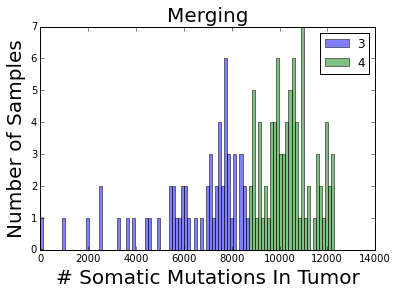

End merging.
****************************************
cfirst lasses are  [3, 4] clusterToPatient is  [3, 4]
Class is  [3, 4] Keys are  [3, 4]
In partition stats Class is  [3, 4] Keys are  [3, 4]


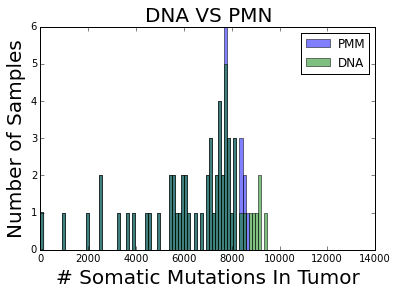

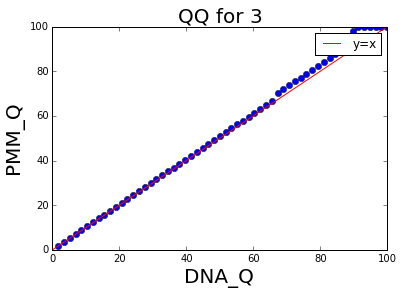

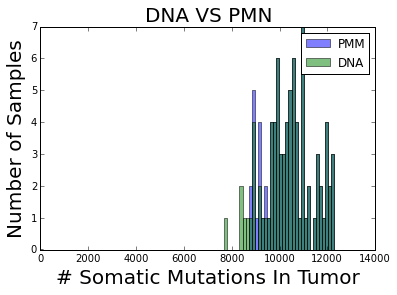

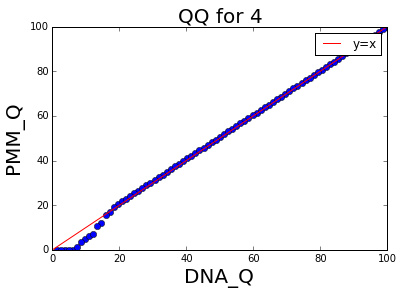

Number agreements  129
Total  140
Prob agreements  0.515918367347
Cohen kappa  0.837689713322
Initial Lambda is  [6081.7142857142862, 7739.0000000000009, 8901.7142857142862, 9814.4285714285725, 10458.857142857143, 10979.571428571428]
Initial p_k is [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
ll_new is  -3969.32497007 missing is  6
ll_new is  -3304.68385002 missing is  5
ll_new is  -3074.04834037 missing is  5
ll_new is  -3052.81022929 missing is  5
ll_new is  -3046.98369232 missing is  5
ll_new is  -3041.78896174 missing is  5
ll_new is  -3039.28319484 missing is  5
ll_new is  -3039.26281875 missing is  5
ll_new is  -3039.26261634 missing is  5
LL: -3039.0 Missing patients:  5
LL: -3039.0 Missing patients:  5
LL: -3039.0 Missing patients:  5
LL: -3039.0 Missing patients:  5
LL: -3039.0 Missing patients:  5
LL: -3039.0 Missing patients:  5
LL: -3540.0 Missing patients:  1
LL: -4914.0 Missing patients:  1


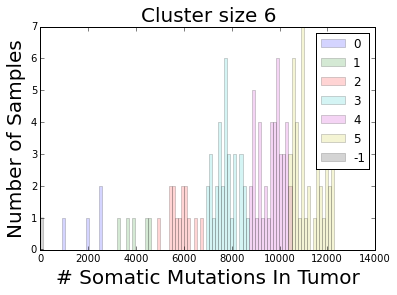

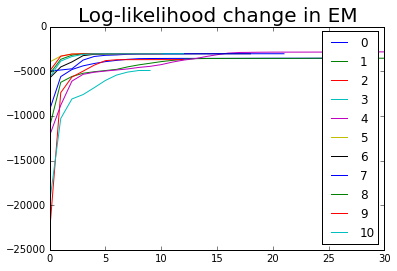

[(1968.75, 0), (3942.4, 1), (5847.285714285715, 2), (7750.212121212121, 3), (9649.166666666666, 4), (11242.707317073171, 5)] 1968.75
****************************************
Begin merging.
Possible merged clusters is  [[(1, 0), 2, -1541.714223737793, True, True], [(2, 1), 1, -4872.0101203210634, True, True], [(0, 1), 1, nan, False, True], [(1, 2), 0, -1749.6385381706691, False, True], [(2, 3), 0, -3564.655443112244, False, True], [(5, 4), 0, -5117.3591887490729, True, False], [(4, 3), 0, -9067.7745035289754, True, False], [(3, 2), 0, -9289.8180907448877, True, False], [(4, 5), 0, -4987.2831523086634, False, False], [(3, 4), 0, -6610.1618264787649, False, False]]
Best cluster is  [(1, 0), 2, -1541.714223737793, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([ 6653.2,  7175. ,  3989.8,  7261.2,  9719.3,  1613.8])), ('Initial p_k', array([ 0.1 ,  0.13,  0.15,  0.16,  0.25,  0.21])), ('Initial LL', -9332.0), ('Number', 6), ('

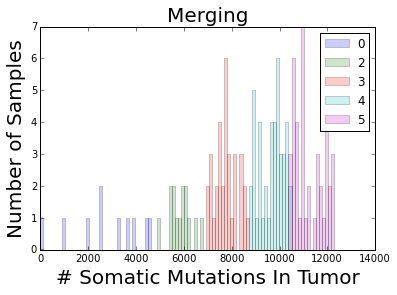

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(1, 0), 1, -4872.0101203210634, True, True], [(0, 1), 4, nan, False, True], [(1, 2), 0, -3564.655443112244, False, True], [(4, 3), 0, -5117.3591887490729, True, False], [(3, 2), 0, -9067.7745035289754, True, False], [(2, 1), 0, -9289.8180907448877, True, False], [(3, 4), 0, -4987.2831523086634, False, False], [(2, 3), 0, -6610.1618264787649, False, False]]
Best cluster is  [(1, 0), 1, -4872.0101203210634, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([ 6653.2,  3989.8,  7261.2,  9719.3,  1613.8])), ('Initial p_k', array([ 0.1 ,  0.15,  0.16,  0.25,  0.21])), ('Initial LL', -9332.0), ('Number', 5), ('OriginalNumber', 6), ('Means', [[1968.8, 3942.4000000000001, 5847.3000000000002], [5847.3000000000002], 7750.1999999999998, 9649.3999999999996, 11242.9]), ('Probabilities', [[0.029999999

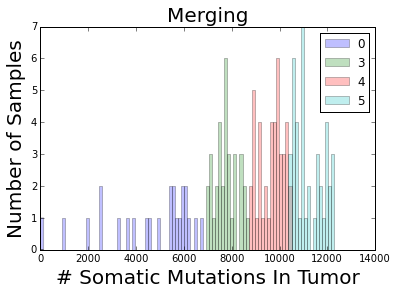

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 9, nan, False, True], [(3, 2), 0, -5117.3591887490729, True, False], [(2, 1), 0, -9067.7745035289754, True, False], [(1, 0), 0, -9289.8180907448877, True, False], [(2, 3), 0, -4987.2831523086634, False, False], [(1, 2), 0, -6610.1618264787649, False, False]]
Best cluster is  [(0, 1), 9, nan, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([ 6653.2,  7261.2,  9719.3,  1613.8])), ('Initial p_k', array([ 0.1 ,  0.16,  0.25,  0.21])), ('Initial LL', -9332.0), ('Number', 4), ('OriginalNumber', 6), ('Means', [[1968.8, 3942.4000000000001, 5847.3000000000002], [7750.1999999999998, 1968.8, 3942.4000000000001, 5847.3000000000002], 9649.3999999999996, 11242.9]), ('Probabilities', [[0.029999999999999999, 0.040000000000000001, 0.10000000000000001], [0.23999999999999999, 0.0299999999999999

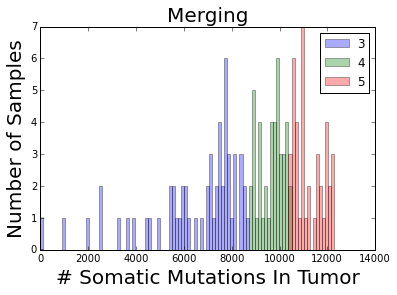

End merging.
****************************************
cfirst lasses are  [3, 4, 5] clusterToPatient is  [3, 4, 5]
Class is  [3, 4, 5] Keys are  [3, 4, 5]
In partition stats Class is  [3, 4, 5] Keys are  [3, 4, 5]


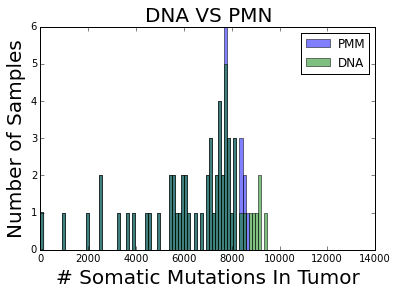

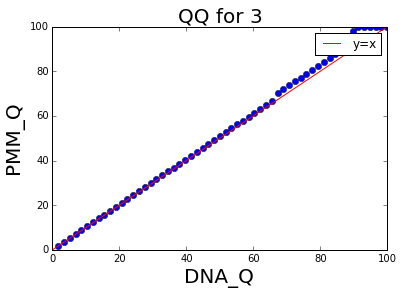

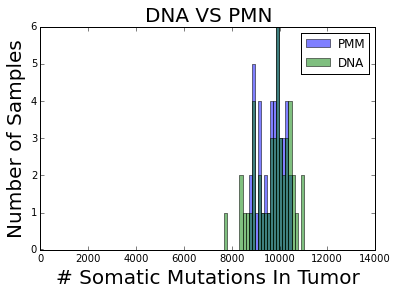

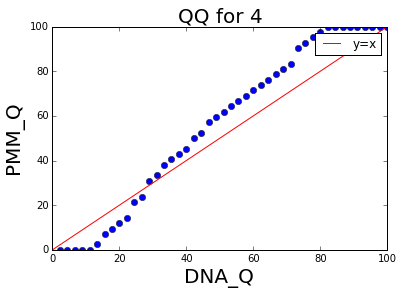

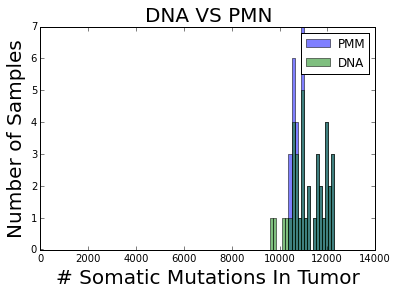

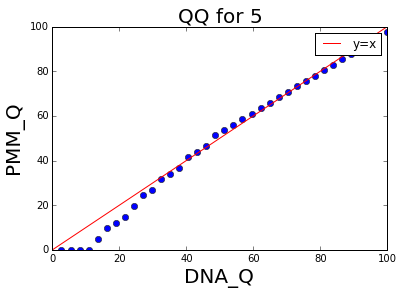

Number agreements  117
Total  140
Prob agreements  0.3425
Cohen kappa  0.750135795763
Initial Lambda is  [5942.625, 7531.5, 8360.625, 9334.5, 10004.0, 10530.5, 11182.0]
Initial p_k is [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
ll_new is  -4125.86695537 missing is  5
ll_new is  -3048.14951195 missing is  5
ll_new is  -2907.10581302 missing is  5
ll_new is  -2892.56500062 missing is  5
ll_new is  -2891.48060023 missing is  5
ll_new is  -2890.89317757 missing is  5
ll_new is  -2890.59082977 missing is  5
ll_new is  -2890.41625813 missing is  5
ll_new is  -2890.27675677 missing is  5
ll_new is  -2890.0881788 missing is  5
ll_new is  -2889.57788578 missing is  5
ll_new is  -2886.68056552 missing is  5
ll_new is  -2874.48776087 missing is  5
ll_new is  -2855.91591343 missing is  5
ll_new is  -2842.70941495 missing is  5
ll_new is  -2825.93574928 missing is  5
ll_new is  -2795.95755852 mis

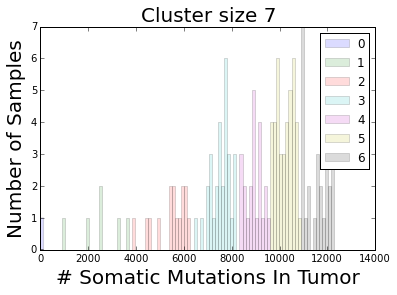

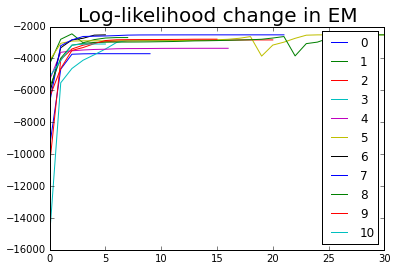

No missing patients in clusters
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 1, 0, True, True], [(1, 2), 4, -483.90619531532093, True, True], [(6, 5), 0, -2428.4100777306448, True, True], [(4, 3), 0, -2673.8953384946781, True, True], [(3, 2), 0, -10416.240803743744, True, True], [(1, 0), 6, 0, False, True], [(2, 1), 12, -1239.3108806053431, False, True], [(4, 5), 0, -1837.8421921265951, False, True], [(3, 4), 0, -3306.1003420160309, False, True], [(2, 3), 1, -3980.1180450842439, False, True], [(5, 4), 0, -3613.7580938310462, True, False], [(5, 6), 0, -3468.6799282112697, False, False]]
Best cluster is  [(0, 1), 1, 0, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  8698.6,   7681.8,    608.4,   7053.5,   9212.7,  12341. ,   1060.4])), ('Initial p_k', array([ 0.3 ,  0.04,  0.31,  0.04,  0.09,  0.15,  0.08])), ('Initial LL', -9539.0), ('Number', 7), ('OriginalNumber', 7), (

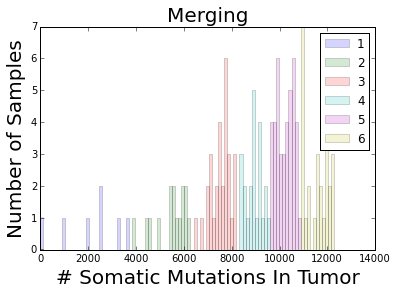

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 5, -483.90619531532093, True, True], [(5, 4), 0, -2428.4100777306448, True, True], [(3, 2), 0, -2673.8953384946781, True, True], [(2, 1), 0, -10416.240803743744, True, True], [(1, 0), 12, -1239.3108806053431, False, True], [(3, 4), 0, -1837.8421921265951, False, True], [(2, 3), 0, -3306.1003420160309, False, True], [(1, 2), 1, -3980.1180450842439, False, True], [(4, 3), 0, -3613.7580938310462, True, False], [(4, 5), 0, -3468.6799282112697, False, False]]
Best cluster is  [(0, 1), 5, -483.90619531532093, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  7681.8,    608.4,   7053.5,   9212.7,  12341. ,   1060.4])), ('Initial p_k', array([ 0.04,  0.31,  0.04,  0.09,  0.15,  0.08])), ('Initial LL', -9539.0), ('Number', 6), ('OriginalNumber', 7), ('Means', [[2461.1999999999998, 5.0

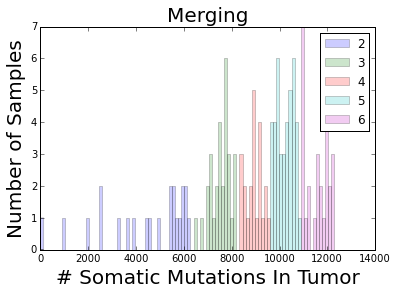

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(4, 3), 0, -2428.4100777306448, True, True], [(2, 1), 0, -2673.8953384946781, True, True], [(1, 0), 0, -10416.240803743744, True, True], [(2, 3), 0, -1837.8421921265951, False, True], [(1, 2), 0, -3306.1003420160309, False, True], [(0, 1), 8, -3980.1180450842439, False, True], [(3, 2), 0, -3613.7580938310462, True, False], [(3, 4), 0, -3468.6799282112697, False, False]]
Best cluster is  [(4, 3), 0, -2428.4100777306448, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([   608.4,   7053.5,   9212.7,  12341. ,   1060.4])), ('Initial p_k', array([ 0.31,  0.04,  0.09,  0.15,  0.08])), ('Initial LL', -9539.0), ('Number', 5), ('OriginalNumber', 7), ('Means', [[5432.6000000000004, 2461.1999999999998, 5.0], 7522.3000000000002, 8907.5, [10197.700000000001, 11586.6], [11586.6]]), ('Probabilities'

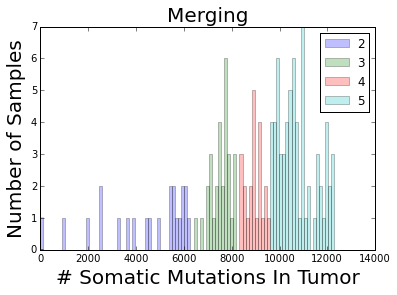

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(2, 1), 0, -2673.8953384946781, True, True], [(1, 0), 0, -10416.240803743744, True, True], [(2, 3), 0, -1837.8421921265951, False, True], [(1, 2), 0, -3306.1003420160309, False, True], [(0, 1), 8, -3980.1180450842439, False, True], [(3, 2), 1, -12823.337257183957, True, False]]
Best cluster is  [(2, 1), 0, -2673.8953384946781, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([   608.4,   7053.5,   9212.7,  12341. ])), ('Initial p_k', array([ 0.31,  0.04,  0.09,  0.15])), ('Initial LL', -9539.0), ('Number', 4), ('OriginalNumber', 7), ('Means', [[5432.6000000000004, 2461.1999999999998, 5.0], [7522.3000000000002, 8907.5], [8907.5], [10197.700000000001, 11586.6]]), ('Probabilities', [[0.11, 0.040000000000000001, 0.01], [0.20999999999999999, 0.16], [0.16], [0.28999999999999998, 0.19]]), ('L

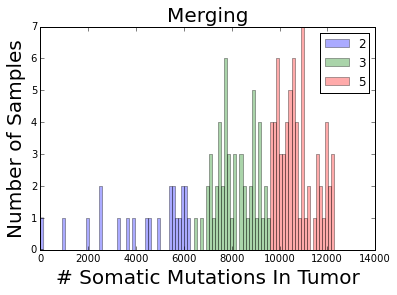

End merging.
****************************************
****************************************
Begin merging.


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:955: RuntimeWarning: divide by zero encountered in log


Possible merged clusters is  [[(0, 1), 8, -3980.1180450842439, False, True], [(1, 0), 19, -12383.733399671039, True, False], [(2, 1), 1, -12823.337257183957, True, False], [(1, 2), 1, -12330.580403670785, False, False]]
Best cluster is  [(0, 1), 8, -3980.1180450842439, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([   608.4,   7053.5,  12341. ])), ('Initial p_k', array([ 0.31,  0.04,  0.15])), ('Initial LL', -9539.0), ('Number', 3), ('OriginalNumber', 7), ('Means', [[5432.6000000000004, 2461.1999999999998, 5.0], [7522.3000000000002, 8907.5, 5432.6000000000004, 2461.1999999999998, 5.0], [10197.700000000001, 11586.6]]), ('Probabilities', [[0.11, 0.040000000000000001, 0.01], [0.20999999999999999, 0.16, 0.11, 0.040000000000000001, 0.01], [0.28999999999999998, 0.19]]), ('Likelihood', -3699.0), ('Classes', [2, 3, 5]), ('AIC', 7427.0), ('BIC', 7468.0), ('Missing', 0), ('MinClusterSize', 22), ('MoreThanMin', 0), ('Merged', True

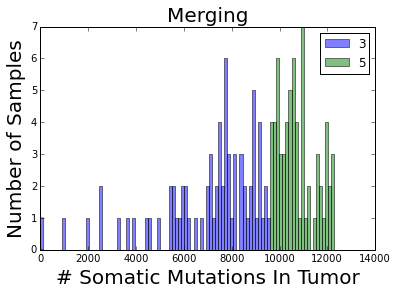

End merging.
****************************************
cfirst lasses are  [3, 5] clusterToPatient is  [3, 5]
Class is  [3, 5] Keys are  [3, 5]
In partition stats Class is  [3, 5] Keys are  [3, 5]


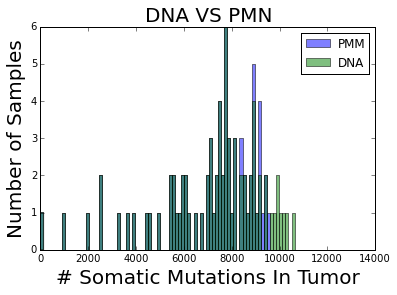

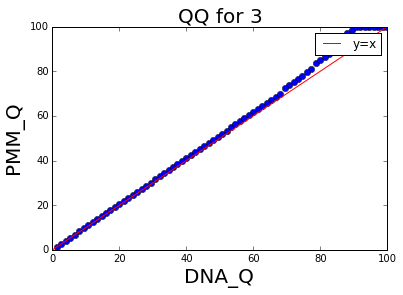

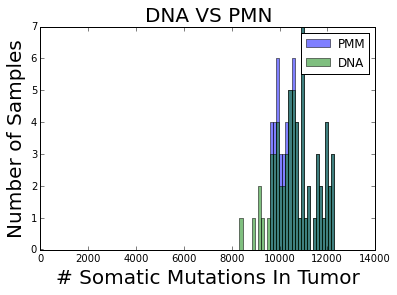

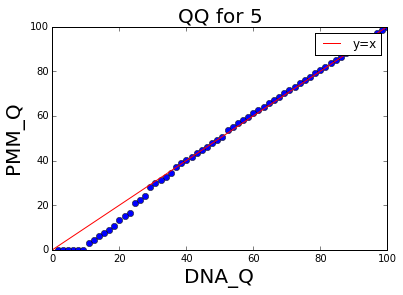

Number agreements  126
Total  140
Prob agreements  0.501530612245
Cohen kappa  0.799385875128
Initial Lambda is  [5772.8888888888887, 7373.4444444444443, 7942.3333333333339, 8933.7777777777774, 9742.8888888888905, 10244.0, 10631.888888888889, 11495.555555555555]
Initial p_k is [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
ll_new is  -3457.1407439 missing is  5
ll_new is  -2822.0764551 missing is  5
ll_new is  -2797.03046031 missing is  5
ll_new is  -2777.2149114 missing is  5
ll_new is  -2745.30056242 missing is  5
ll_new is  -2689.53091701 missing is  5
ll_new is  -2568.7568184 missing is  5
ll_new is  -3785.77751867 missing is  3
ll_new is  -3063.4103096 missing is  3
ll_new is  -2895.09057884 missing is  2
ll_new is  -2664.35642438 missing is  2
ll_new is  -2467.96816958 missing is  2
ll_new is  -2449.194571 missing is  2
ll_new is  -2448.68310595 missing is  2
ll_new is  -2448.23243311 missing is  2
ll_new is  -2448.09068804 missing is  2
ll_new is  -2448.05228822 missin

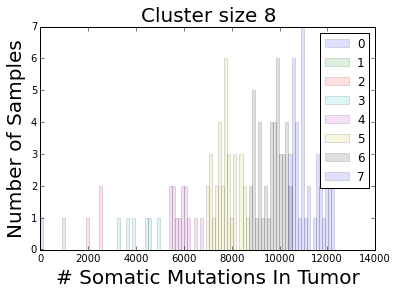

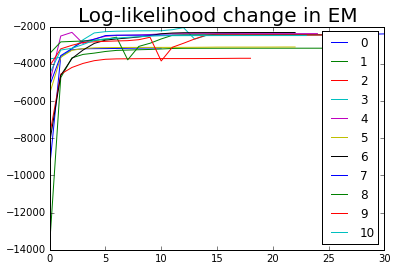

No missing patients in clusters
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 1, 0, True, True], [(4, 3), 0, -4562.9571040747614, True, True], [(1, 0), 1, 0, False, True], [(2, 1), 2, -422.43508134873065, False, True], [(1, 2), 0, -519.64895997855933, False, True], [(3, 2), 3, -794.43093744711359, False, True], [(2, 3), 0, -1402.3973994573303, False, True], [(3, 4), 0, -1855.247021723249, False, True], [(4, 5), 0, -3057.6313866277533, False, True], [(7, 6), 0, -5117.3591887490729, True, False], [(5, 4), 0, -8560.7456056592146, True, False], [(6, 5), 0, -9067.7745035289754, True, False], [(6, 7), 0, -4987.2831523086634, False, False], [(5, 6), 0, -6610.1618264787649, False, False]]
Best cluster is  [(0, 1), 1, 0, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  1177.3,   8421.3,     51.8,   2040.6,   7201.5,   2989. ,
        11998.8,   7827.1])), ('Initial p_k', array([ 0.

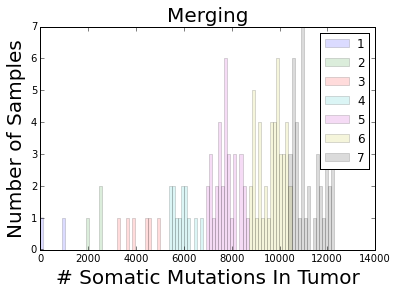

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(3, 2), 0, -4562.9571040747614, True, True], [(1, 0), 2, -422.43508134873065, False, True], [(0, 1), 1, -519.64895997855933, False, True], [(2, 1), 3, -794.43093744711359, False, True], [(1, 2), 0, -1402.3973994573303, False, True], [(2, 3), 0, -1855.247021723249, False, True], [(3, 4), 0, -3057.6313866277533, False, True], [(6, 5), 0, -5117.3591887490729, True, False], [(4, 3), 0, -8560.7456056592146, True, False], [(5, 4), 0, -9067.7745035289754, True, False], [(5, 6), 0, -4987.2831523086634, False, False], [(4, 5), 0, -6610.1618264787649, False, False]]
Best cluster is  [(3, 2), 0, -4562.9571040747614, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  8421.3,     51.8,   2040.6,   7201.5,   2989. ,  11998.8,   7827.1])), ('Initial p_k', array([ 0.22,  0.07,  0.05,  0.04,  0.14,  0

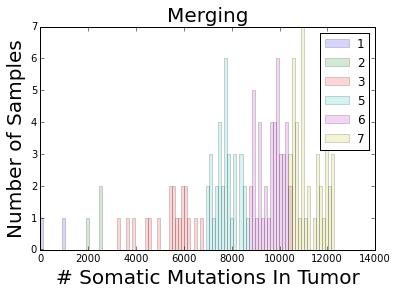

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(1, 0), 2, -422.43508134873065, False, True], [(0, 1), 1, -519.64895997855933, False, True], [(2, 1), 16, -794.43093744711359, False, True], [(1, 2), 0, -1402.3973994573303, False, True], [(2, 3), 5, -3564.1191285879522, False, True], [(5, 4), 0, -5117.3591887490729, True, False], [(3, 2), 0, -8560.7456056592146, True, False], [(4, 3), 0, -9067.7745035289754, True, False], [(4, 5), 0, -4987.2831523086634, False, False], [(3, 4), 0, -6610.1618264787649, False, False]]
Best cluster is  [(1, 0), 2, -422.43508134873065, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  8421.3,     51.8,   2040.6,   2989. ,  11998.8,   7827.1])), ('Initial p_k', array([ 0.22,  0.07,  0.05,  0.14,  0.23,  0.01])), ('Initial LL', -9605.0), ('Number', 6), ('OriginalNumber', 8), ('Means', [[945.0, 5.0, 2310.

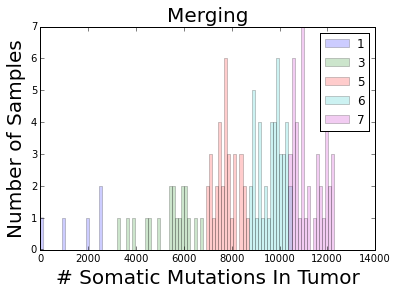

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(1, 0), 16, -794.43093744711359, False, True], [(0, 1), 2, -1402.3973994573303, False, True], [(1, 2), 5, -3564.1191285879522, False, True], [(4, 3), 0, -5117.3591887490729, True, False], [(2, 1), 0, -8560.7456056592146, True, False], [(3, 2), 0, -9067.7745035289754, True, False], [(3, 4), 0, -4987.2831523086634, False, False], [(2, 3), 0, -6610.1618264787649, False, False]]
Best cluster is  [(1, 0), 16, -794.43093744711359, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  8421.3,   2040.6,   2989. ,  11998.8,   7827.1])), ('Initial p_k', array([ 0.22,  0.05,  0.14,  0.23,  0.01])), ('Initial LL', -9605.0), ('Number', 5), ('OriginalNumber', 8), ('Means', [[945.0, 5.0, 2310.0, 4108.0, 5917.1999999999998], [4108.0, 5917.1999999999998], 7750.1999999999998, 9649.3999999999996, 11242.9]

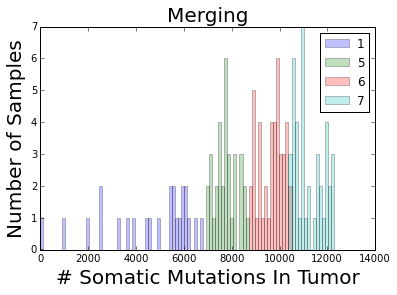

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 10, -3564.1191285879522, False, True], [(3, 2), 0, -5117.3591887490729, True, False], [(1, 0), 0, -8560.7456056592146, True, False], [(2, 1), 0, -9067.7745035289754, True, False], [(2, 3), 0, -4987.2831523086634, False, False], [(1, 2), 0, -6610.1618264787649, False, False]]
Best cluster is  [(0, 1), 10, -3564.1191285879522, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  8421.3,   2989. ,  11998.8,   7827.1])), ('Initial p_k', array([ 0.22,  0.14,  0.23,  0.01])), ('Initial LL', -9605.0), ('Number', 4), ('OriginalNumber', 8), ('Means', [[945.0, 5.0, 2310.0, 4108.0, 5917.1999999999998], [7750.1999999999998, 945.0, 5.0, 2310.0, 4108.0, 5917.1999999999998], 9649.3999999999996, 11242.9]), ('Probabilities', [[0.01, 0.01, 0.02, 0.040000000000000001, 0.089999999999999997], [0.23

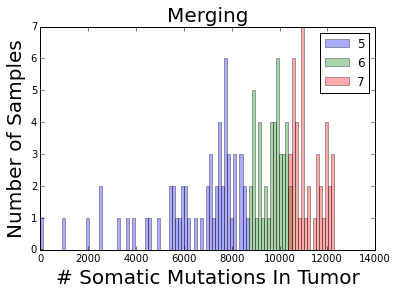

End merging.
****************************************
cfirst lasses are  [5, 6, 7] clusterToPatient is  [5, 6, 7]
Class is  [5, 6, 7] Keys are  [5, 6, 7]
In partition stats Class is  [5, 6, 7] Keys are  [5, 6, 7]


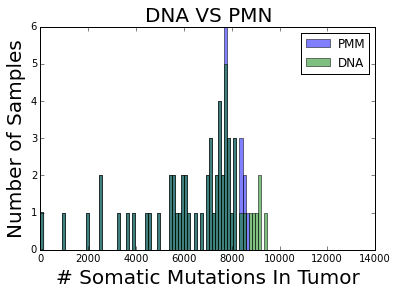

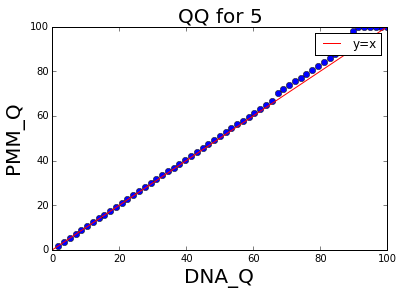

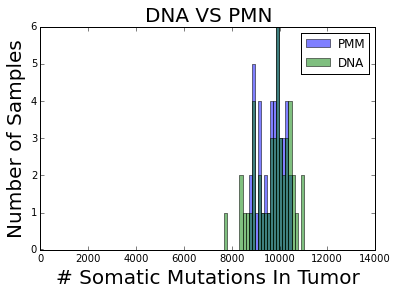

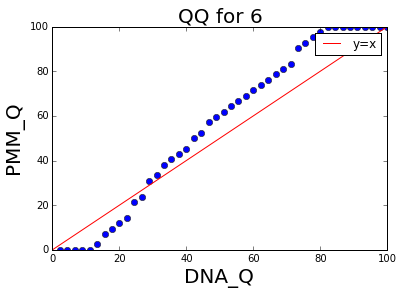

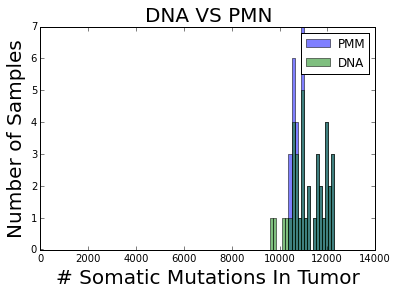

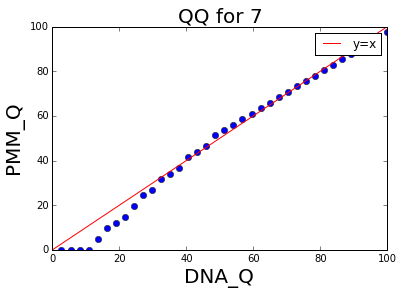

Number agreements  117
Total  140
Prob agreements  0.3425
Cohen kappa  0.750135795763
Initial Lambda is  [5597.8000000000002, 7153.3999999999996, 7766.6999999999998, 8592.2000000000007, 9334.5, 9934.0, 10374.799999999999, 10735.6, 11542.200000000001]
Initial p_k is [0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]
ll_new is  -3126.76048648 missing is  5
ll_new is  -2725.56252984 missing is  5
ll_new is  -2664.81009518 missing is  5
ll_new is  -2492.88981241 missing is  5
ll_new is  -3736.7594347 missing is  3
ll_new is  -2922.80815867 missing is  3
ll_new is  -2755.5529462 missing is  2
ll_new is  -2543.60899054 missing is  2
ll_new is  -2335.77001086 missing is  2
ll_new is  -2313.3680634 missing is  2
ll_new is  -2305.69667086 missing is  2
ll_new is  -2305.38467414 missing is  2
ll_new is  -2305.24759896 missing is  2
ll_new is  -2305.12816969 missing is

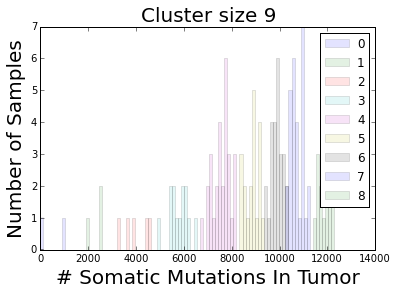

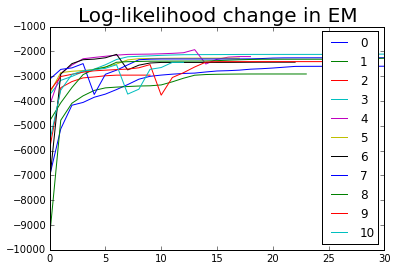

No missing patients in clusters
****************************************
Begin merging.
Possible merged clusters is  [[(2, 1), 2, -849.06938956069826, True, True], [(7, 6), 0, -959.26310995967481, True, True], [(8, 7), 0, -1187.4574287615899, True, True], [(6, 5), 0, -1491.2704430214856, True, True], [(5, 4), 0, -1938.6768955411508, True, True], [(3, 2), 0, -4875.568193258704, True, True], [(4, 3), 0, -7002.230475550442, True, True], [(1, 0), 3, 0, False, True], [(0, 1), 1, -339.61169330970756, False, True], [(6, 7), 0, -785.05393406057874, False, True], [(5, 6), 0, -1053.466674095959, False, True], [(1, 2), 0, -1190.7434563020015, False, True], [(2, 3), 0, -1643.1299121046693, False, True], [(7, 8), 0, -1881.5558611679103, False, True], [(4, 5), 0, -2698.0668997695575, False, True], [(3, 4), 0, -2943.3187318581577, False, True]]
Best cluster is  [(2, 1), 2, -849.06938956069826, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', ar

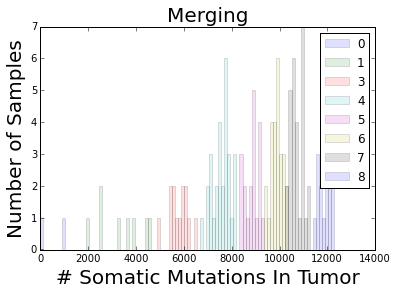

End merging.
****************************************
****************************************
Begin merging.


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:989: RuntimeWarning: divide by zero encountered in log


Possible merged clusters is  [[(6, 5), 0, -959.26310995967481, True, True], [(7, 6), 0, -1187.4574287615899, True, True], [(5, 4), 0, -1491.2704430214856, True, True], [(4, 3), 0, -1938.6768955411508, True, True], [(2, 1), 0, -4875.568193258704, True, True], [(3, 2), 0, -7002.230475550442, True, True], [(1, 0), 8, 0, False, True], [(0, 1), 1, -339.61169330970756, False, True], [(5, 6), 0, -785.05393406057874, False, True], [(4, 5), 0, -1053.466674095959, False, True], [(1, 2), 3, -1643.1299121046693, False, True], [(6, 7), 0, -1881.5558611679103, False, True], [(3, 4), 0, -2698.0668997695575, False, True], [(2, 3), 0, -2943.3187318581577, False, True]]
Best cluster is  [(6, 5), 0, -959.26310995967481, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  2030.1,   2203.8,   9034.5,  10388.2,  12670.8,   7638.5,
        10848.6,    706.9])), ('Initial p_k', array([ 0.12,  0.04,  0.14,  0.19,  0.1 ,  0.16,  0.07,  0.09])), ('In

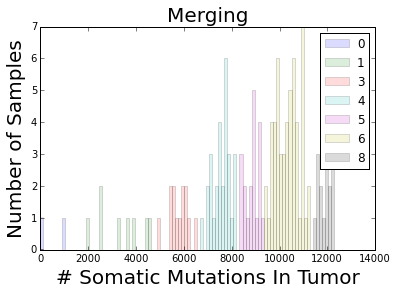

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(6, 5), 0, -1187.4574287615899, True, True], [(4, 3), 0, -1938.6768955411508, True, True], [(2, 1), 0, -4875.568193258704, True, True], [(3, 2), 0, -7002.230475550442, True, True], [(1, 0), 8, 0, False, True], [(0, 1), 1, -339.61169330970756, False, True], [(4, 5), 0, -1053.466674095959, False, True], [(1, 2), 3, -1643.1299121046693, False, True], [(3, 4), 0, -2698.0668997695575, False, True], [(2, 3), 0, -2943.3187318581577, False, True], [(5, 4), 0, -6665.945637390706, True, False], [(5, 6), 0, -6616.3005011924206, False, False]]
Best cluster is  [(6, 5), 0, -1187.4574287615899, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  2030.1,   2203.8,   9034.5,  10388.2,  12670.8,   7638.5,    706.9])), ('Initial p_k', array([ 0.12,  0.04,  0.14,  0.19,  0.1 ,  0.16,  0.09])), ('Initial 

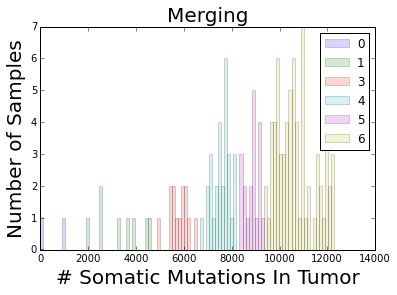

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(4, 3), 0, -1938.6768955411508, True, True], [(2, 1), 0, -4875.568193258704, True, True], [(3, 2), 0, -7002.230475550442, True, True], [(1, 0), 8, 0, False, True], [(0, 1), 1, -339.61169330970756, False, True], [(4, 5), 0, -1053.466674095959, False, True], [(1, 2), 3, -1643.1299121046693, False, True], [(3, 4), 0, -2698.0668997695575, False, True], [(2, 3), 0, -2943.3187318581577, False, True], [(5, 4), 1, -14233.162174305638, True, False]]
Best cluster is  [(4, 3), 0, -1938.6768955411508, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  2030.1,   2203.8,   9034.5,  10388.2,  12670.8,   7638.5])), ('Initial p_k', array([ 0.12,  0.04,  0.14,  0.19,  0.1 ,  0.16])), ('Initial LL', -7032.0), ('Number', 6), ('OriginalNumber', 9), ('Means', [475.0, [2310.0, 3942.4000000000001], 5780.8000

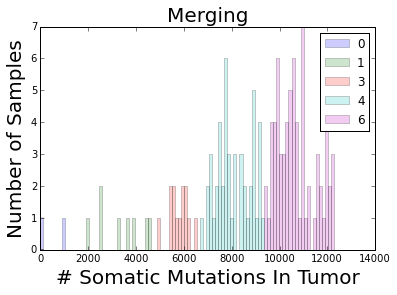

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(2, 1), 0, -4875.568193258704, True, True], [(1, 0), 8, 0, False, True], [(0, 1), 1, -339.61169330970756, False, True], [(1, 2), 3, -1643.1299121046693, False, True], [(2, 3), 0, -2943.3187318581577, False, True], [(4, 3), 1, -14233.162174305638, True, False], [(3, 2), 7, -14501.847069680622, True, False], [(3, 4), 0, -9255.2713353606468, False, False]]
Best cluster is  [(2, 1), 0, -4875.568193258704, True, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  2030.1,   2203.8,   9034.5,  10388.2,   7638.5])), ('Initial p_k', array([ 0.12,  0.04,  0.14,  0.19,  0.16])), ('Initial LL', -7032.0), ('Number', 5), ('OriginalNumber', 9), ('Means', [475.0, [2310.0, 3942.4000000000001, 5780.8000000000002], [5780.8000000000002], [7556.5, 8829.2999999999993], [9863.1000000000004, 10684.4, 11933.79999999

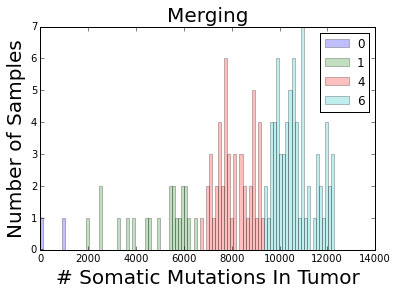

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(1, 0), 21, 0, False, True], [(0, 1), 1, -339.61169330970756, False, True], [(1, 2), 6, -4334.5115297142092, False, True], [(3, 2), 1, -14233.162174305638, True, False], [(2, 1), 7, -14501.847069680622, True, False], [(2, 3), 0, -9255.2713353606468, False, False]]
Best cluster is  [(1, 0), 21, 0, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  2030.1,   2203.8,  10388.2,   7638.5])), ('Initial p_k', array([ 0.12,  0.04,  0.19,  0.16])), ('Initial LL', -7032.0), ('Number', 4), ('OriginalNumber', 9), ('Means', [[475.0, 2310.0, 3942.4000000000001, 5780.8000000000002], [2310.0, 3942.4000000000001, 5780.8000000000002], [7556.5, 8829.2999999999993], [9863.1000000000004, 10684.4, 11933.799999999999]]), ('Probabilities', [[0.01, 0.02, 0.040000000000000001, 0.089999999999999997], [0.02, 0.

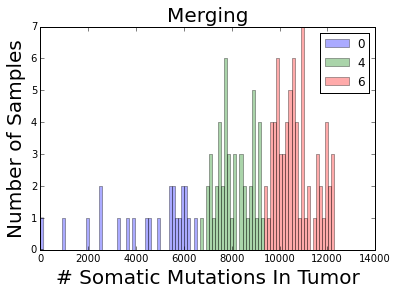

End merging.
****************************************
****************************************
Begin merging.
Possible merged clusters is  [[(0, 1), 8, -4334.5115297142092, False, True], [(2, 1), 1, -14233.162174305638, True, False], [(1, 0), 7, -14501.847069680622, True, False], [(1, 2), 0, -9255.2713353606468, False, False]]
Best cluster is  [(0, 1), 8, -4334.5115297142092, False, True]
MERGING the probs and likelihoods
MERGING: HERE ARE OLD VALUES OrderedDict([('Initial Means', array([  2030.1,  10388.2,   7638.5])), ('Initial p_k', array([ 0.12,  0.19,  0.16])), ('Initial LL', -7032.0), ('Number', 3), ('OriginalNumber', 9), ('Means', [[475.0, 2310.0, 3942.4000000000001, 5780.8000000000002], [7556.5, 8829.2999999999993, 475.0, 2310.0, 3942.4000000000001, 5780.8000000000002], [9863.1000000000004, 10684.4, 11933.799999999999]]), ('Probabilities', [[0.01, 0.02, 0.040000000000000001, 0.089999999999999997], [0.20000000000000001, 0.14000000000000001, 0.01, 0.02, 0.040000000000000001, 0.08

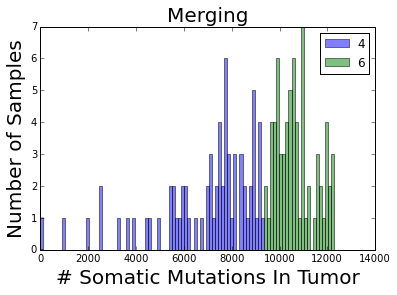

End merging.
****************************************
cfirst lasses are  [4, 6] clusterToPatient is  [4, 6]
Class is  [4, 6] Keys are  [4, 6]
In partition stats Class is  [4, 6] Keys are  [4, 6]


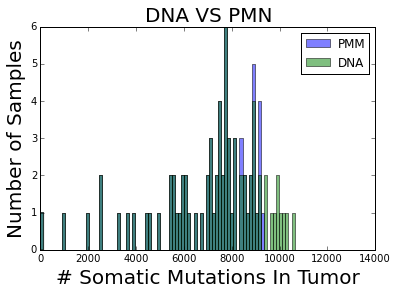

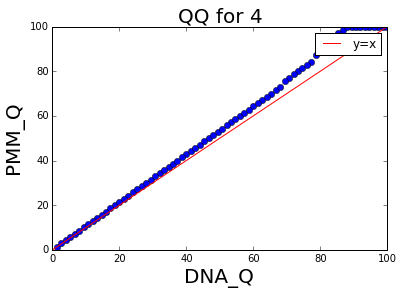

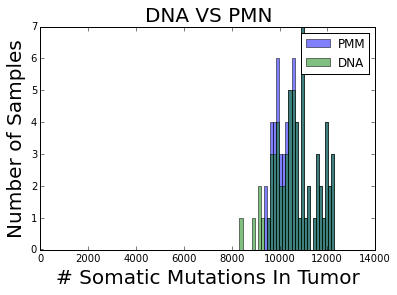

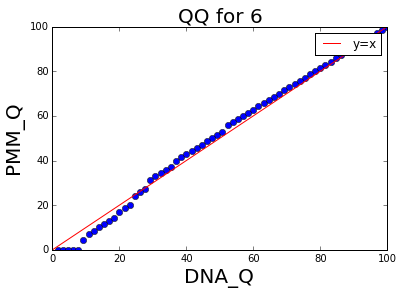

Number agreements  125
Total  140
Prob agreements  0.5
Cohen kappa  0.785714285714
(OrderedDict([('Initial Means', array([  7942.3,  10244. ])), ('Initial p_k', array([ 0.5,  0.5])), ('Initial LL', -9514.0), ('Number', 2), ('OriginalNumber', 2), ('Means', [7073.1999999999998, 10436.299999999999]), ('Probabilities', [0.37, 0.63]), ('Likelihood', -9025.0), ('Classes', [0, 1]), ('AIC', 18057.0), ('BIC', 18069.0), ('Missing', 8), ('MinClusterSize', 49), ('MoreThanMin', 1), ('Merged', False), ('MergeHistory', set([])), ('IsFirst', True), ('CohenKappa', 0.837689713322091)]), OrderedDict([('Initial Means', array([ 10388.2,   7638.5])), ('Initial p_k', array([ 0.19,  0.16])), ('Initial LL', -7032.0), ('Number', 2), ('OriginalNumber', 9), ('Means', [[7556.5, 8829.2999999999993, 475.0, 2310.0, 3942.4000000000001, 5780.8000000000002], [9863.1000000000004, 10684.4, 11933.799999999999]]), ('Probabilities', [[0.20000000000000001, 0.14000000000000001, 0.01, 0.02, 0.040000000000000001, 0.0899999999999

In [130]:
#Left off here 4/7/16. STill need to get bet backward selection working. ERror in data. Run this again.
run_partitions(do_cross_val=False, rand_num = 5, far_rand_num = 5, minComp=2, maxComp=10,
              min_cluster_size=30, do_pmm_dna=True)

In [21]:
#OV RUNS
run_partitions()
print "USING 10 FOLDS NOW"
run_partitions(out_file='/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/OV_broad-cna-jl-PMM-crossval-10.txt',
    kf_num_folds = 10)
print "USING 3 FOLDS NOW"
run_partitions(out_file='/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/OV_broad-cna-jl-PMM-crossval-3.txt',
    kf_num_folds = 3)

Initial Lambda is  [7942.3333333333339, 10244.0]
Initial p_k is [0.5, 0.5]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:728: RuntimeWarning: divide by zero encountered in log


ll_new is  -9513.88022894 missing is  10
ll_new is  -9464.84959313 missing is  8
ll_new is  -9113.62468321 missing is  8
ll_new is  -9024.72708705 missing is  8
ll_new is  -9024.72708705 missing is  8


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:633: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:564: RuntimeWarning: divide by zero encountered in log


KeyboardInterrupt: 

Initial Lambda is  [3413.3333333333344, 8020.666666666667]
Initial p_k is [0.5, 0.5]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:746: RuntimeWarning: divide by zero encountered in log


ll_new is  -168616.204541 missing is  197
ll_new is  -177796.357852 missing is  167
ll_new is  -179893.225956 missing is  161
ll_new is  -174965.255855 missing is  166
ll_new is  -170226.649071 missing is  171
ll_new is  -164530.285271 missing is  177
ll_new is  -157321.440753 missing is  185
ll_new is  -144823.688049 missing is  199
ll_new is  -138926.965749 missing is  205
ll_new is  -136361.137253 missing is  208
ll_new is  -135569.81651 missing is  209
ll_new is  -134034.602812 missing is  211
ll_new is  -133997.045104 missing is  211
ll_new is  -133997.042388 missing is  211


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:646: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:577: RuntimeWarning: divide by zero encountered in log


LL: -133997.0 Missing patients:  211


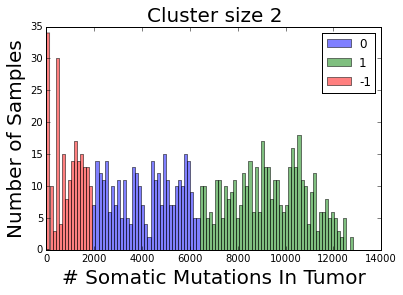

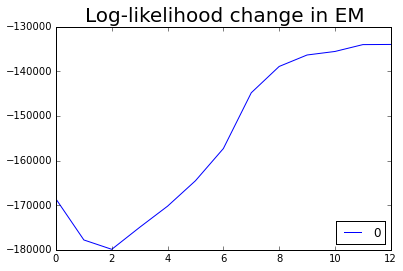

[(4152.210365853659, 0), (9340.040094339623, 1)] 4152.21036585
cfirst lasses are  [0, 1] clusterToPatient is  [0, 1]
Class is  [0, 1] Keys are  [0, 1]
In partition stats Class is  [0, 1] Keys are  [0, 1]


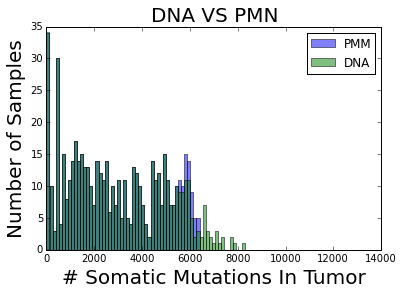

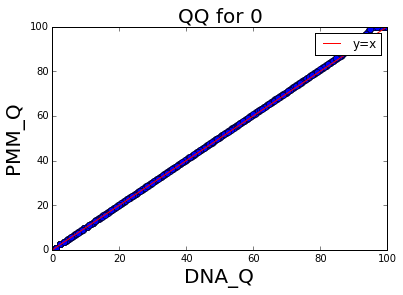

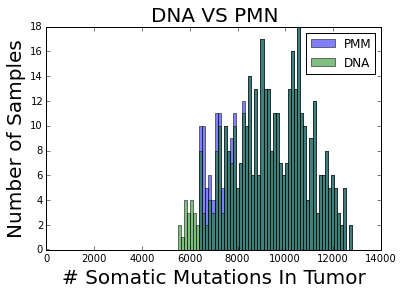

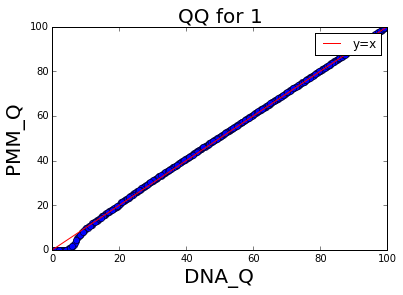

Number agreements  919
Total  963
Prob agreements  0.507874427547
Cohen kappa  0.907156723972
Initial Lambda is  [2267.5, 5632.0, 9036.5]
Initial p_k is [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
ll_new is  -121346.938124 missing is  87
ll_new is  -111277.133246 missing is  79
ll_new is  -112305.673434 missing is  75
ll_new is  -124942.572127 missing is  57
ll_new is  -130224.97208 missing is  47
ll_new is  -129917.158019 missing is  46
ll_new is  -130269.883573 missing is  45
ll_new is  -130855.886284 missing is  44
ll_new is  -130802.5084 missing is  44
ll_new is  -130664.590495 missing is  44
ll_new is  -130599.262063 missing is  44
ll_new is  -130581.046005 missing is  44
ll_new is  -130573.033963 missing is  44
ll_new is  -130571.72015 missing is  44
ll_new is  -130563.103278 missing is  44
ll_new is  -130494.845074 missing is  44
ll_new is  -130466.273085 missing is  44
ll_new is  -130457.041965 missing is  44
ll_new is  -130456.887439 missing is  44
ll_new is  

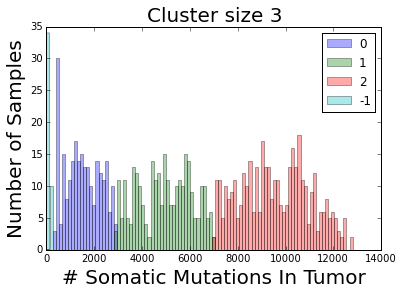

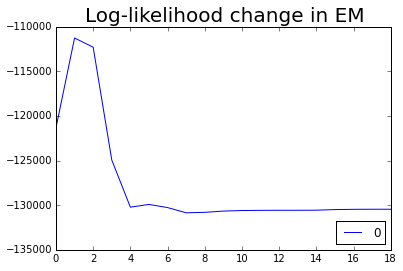

[(1508.1061224489797, 0), (4929.183745583039, 1), (9567.81841432225, 2)] 1508.10612245
cfirst lasses are  [0, 1, 2] clusterToPatient is  [0, 1, 2]
Class is  [0, 1, 2] Keys are  [0, 1, 2]
In partition stats Class is  [0, 1, 2] Keys are  [0, 1, 2]


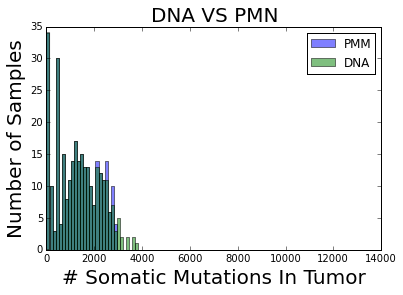

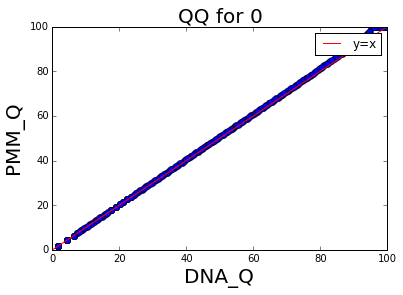

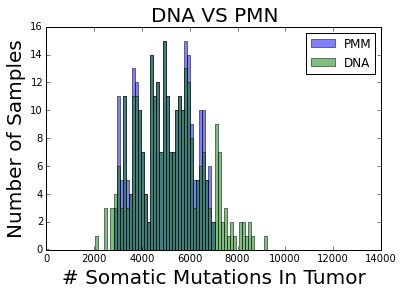

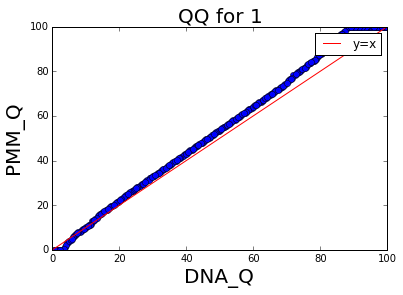

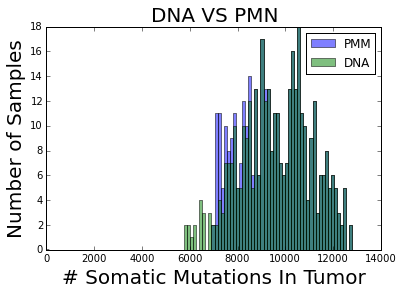

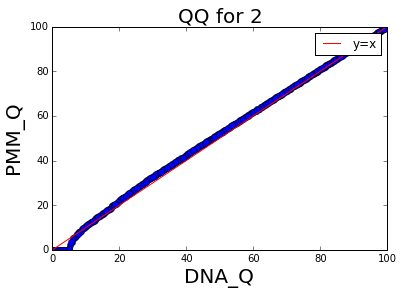

Number agreements  890
Total  963
Prob agreements  0.339324476018
Cohen kappa  0.885261714733
Initial Lambda is  [1674.8000000000002, 4454.8000000000002, 7055.3999999999996, 9510.4000000000015]
Initial p_k is [0.25, 0.25, 0.25, 0.25]
ll_new is  -99750.3300416 missing is  46
ll_new is  -90795.6808964 missing is  44
ll_new is  -88646.8154316 missing is  44
ll_new is  -89225.6407563 missing is  42
ll_new is  -88750.2769803 missing is  42
ll_new is  -90561.7503879 missing is  39
ll_new is  -90204.6533409 missing is  39
ll_new is  -90024.610407 missing is  39
ll_new is  -89769.7287547 missing is  39
ll_new is  -89562.253075 missing is  39
ll_new is  -90076.5787086 missing is  38
ll_new is  -91092.4825484 missing is  36
ll_new is  -91715.4255729 missing is  34
ll_new is  -92238.4085054 missing is  32
ll_new is  -92177.5720623 missing is  31
ll_new is  -92121.8097992 missing is  30
ll_new is  -92562.9219921 missing is  29
ll_new is  -92260.7433533 missing is  29
ll_new is  -92642.6817959 miss

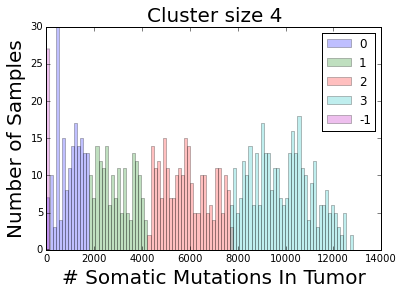

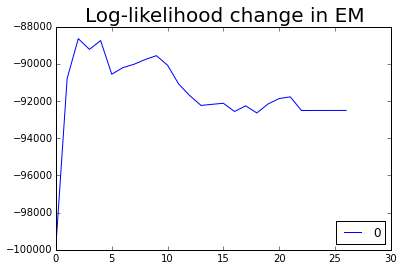

[(961.580459770115, 0), (2924.5202312138726, 1), (5891.4112903225805, 2), (9893.278592375367, 3)] 961.58045977
cfirst lasses are  [0, 1, 2, 3] clusterToPatient is  [0, 1, 2, 3]
Class is  [0, 1, 2, 3] Keys are  [0, 1, 2, 3]
In partition stats Class is  [0, 1, 2, 3] Keys are  [0, 1, 2, 3]


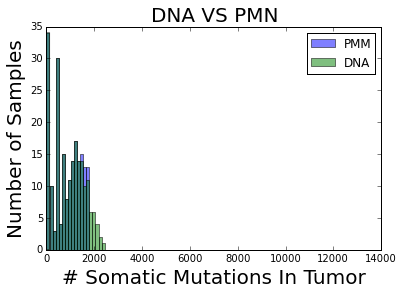

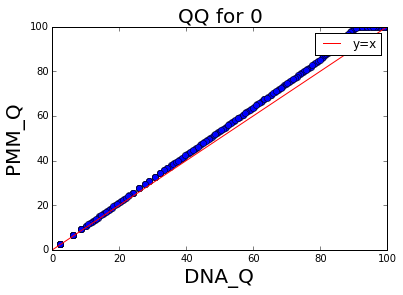

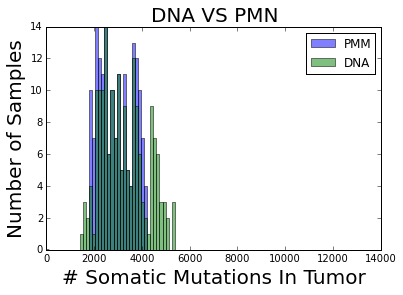

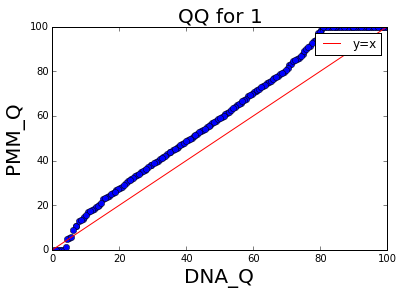

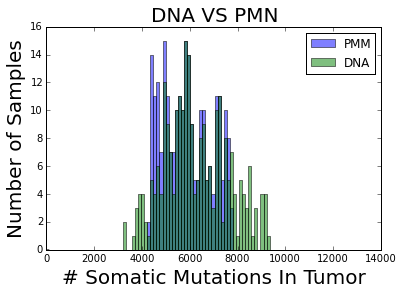

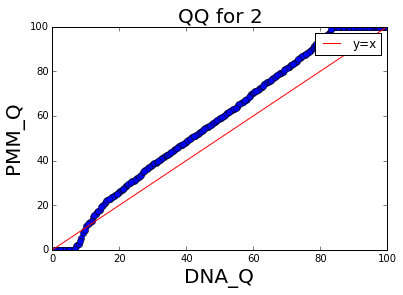

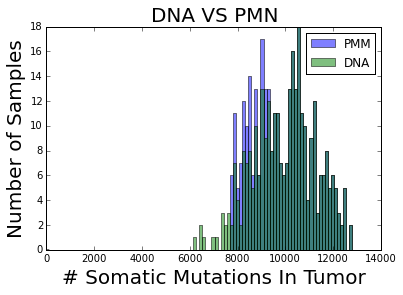

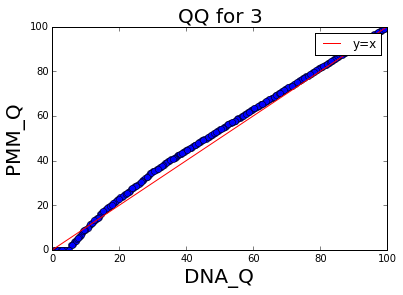

Number agreements  830
Total  963
Prob agreements  0.263876623006
Cohen kappa  0.812381895473
Initial Lambda is  [1416.3333333333335, 3413.3333333333344, 5632.0, 8020.666666666667, 10034.0]
Initial p_k is [0.2, 0.2, 0.2, 0.2, 0.2]
ll_new is  -67563.3703851 missing is  44
ll_new is  -63515.3572321 missing is  39
ll_new is  -63780.0943139 missing is  33
ll_new is  -64665.699785 missing is  30
ll_new is  -65691.0879072 missing is  28
ll_new is  -65480.6355856 missing is  28
ll_new is  -66194.8017658 missing is  27
ll_new is  -66164.0827512 missing is  27
ll_new is  -66154.5988849 missing is  27
ll_new is  -66140.44775 missing is  27
ll_new is  -66859.8070243 missing is  26
ll_new is  -66829.062432 missing is  26
ll_new is  -66820.3071694 missing is  26
ll_new is  -66816.3892528 missing is  26
ll_new is  -66808.5847754 missing is  26
ll_new is  -66800.7504973 missing is  26
ll_new is  -67528.1496566 missing is  25
ll_new is  -68192.2100395 missing is  24
ll_new is  -68115.635027 missing is

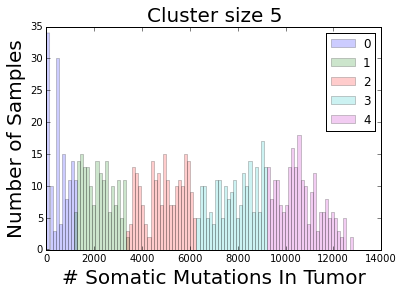

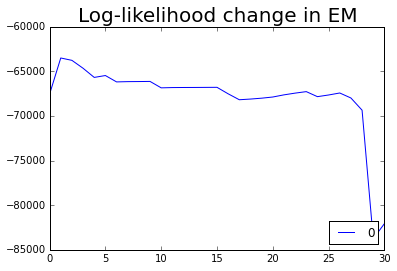

No missing patients in clusters
cfirst lasses are  [0, 1, 2, 3, 4] clusterToPatient is  [0, 1, 2, 3, 4]
Class is  [0, 1, 2, 3, 4] Keys are  [0, 1, 2, 3, 4]
In partition stats Class is  [0, 1, 2, 3, 4] Keys are  [0, 1, 2, 3, 4]


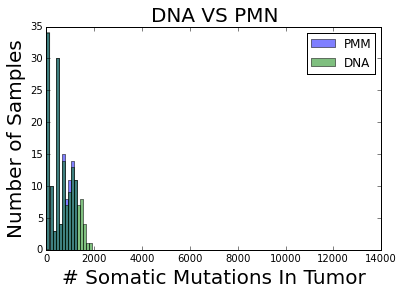

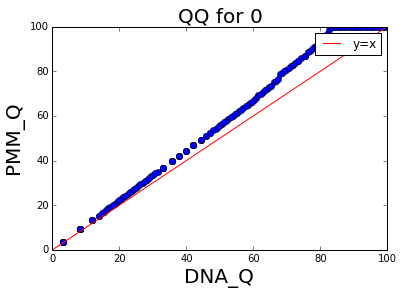

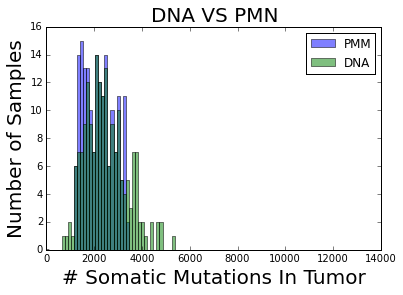

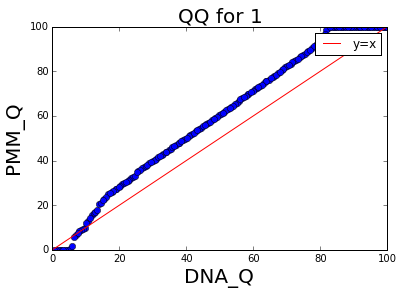

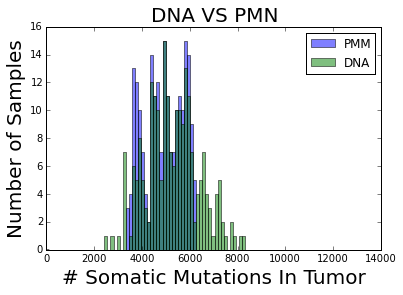

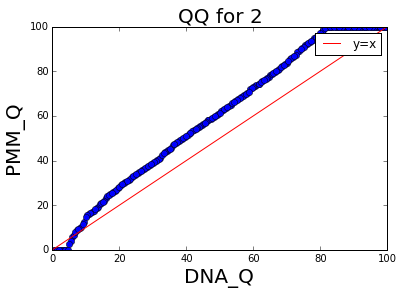

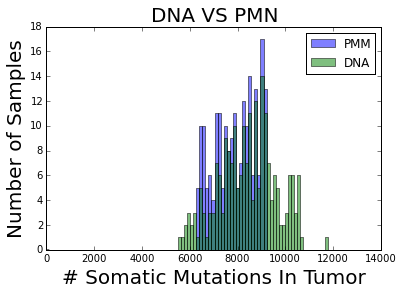

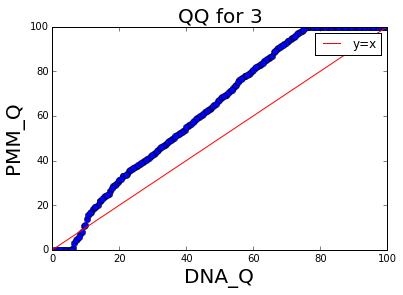

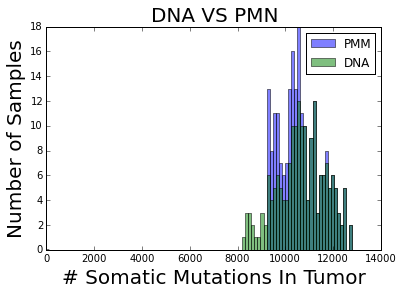

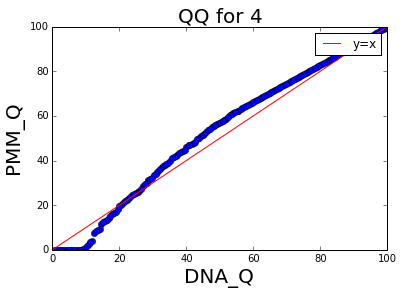

Number agreements  766
Total  963
Prob agreements  0.202887955064
Cohen kappa  0.743362233282
Initial Lambda is  [1233.8571428571431, 2688.2857142857147, 4729.4285714285716, 6562.4285714285743, 8585.2857142857119, 10282.285714285714]
Initial p_k is [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
ll_new is  -52657.1021565 missing is  39
ll_new is  -52550.3561859 missing is  30
ll_new is  -52184.660795 missing is  28
ll_new is  -53578.1306465 missing is  24
ll_new is  -52300.8886488 missing is  24
ll_new is  -52273.3628497 missing is  23
ll_new is  -61977.6725371 missing is  9
ll_new is  -66510.7640094 missing is  0
ll_new is  -64064.2213868 missing is  0
ll_new is  -62762.2489936 missing is  0
ll_new is  -62131.9017037 missing is  0
ll_new is  -61028.4686811 missing is  0
ll_new is  -60206.3050912 missing is  0
ll_new is  -59934.6974403 missing is  0
ll_new is  -59791.8549534 missing is  0
ll_new is  -59475.2

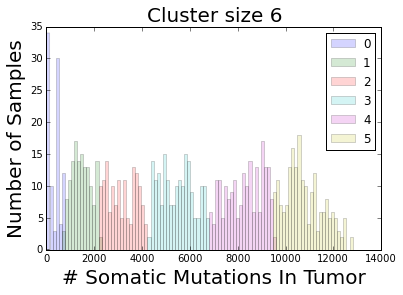

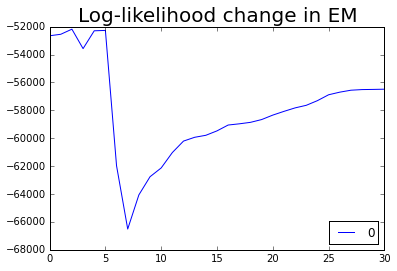

No missing patients in clusters
cfirst lasses are  [0, 1, 2, 3, 4, 5] clusterToPatient is  [0, 1, 2, 3, 4, 5]
Class is  [0, 1, 2, 3, 4, 5] Keys are  [0, 1, 2, 3, 4, 5]
In partition stats Class is  [0, 1, 2, 3, 4, 5] Keys are  [0, 1, 2, 3, 4, 5]


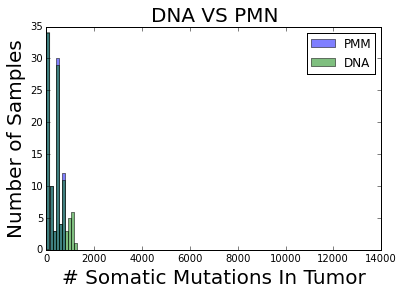

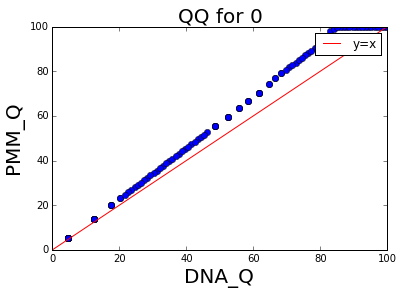

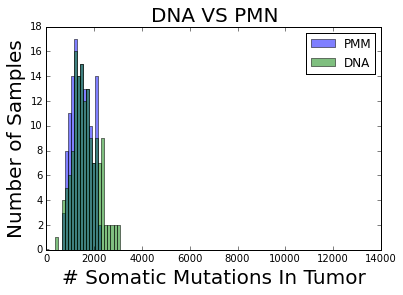

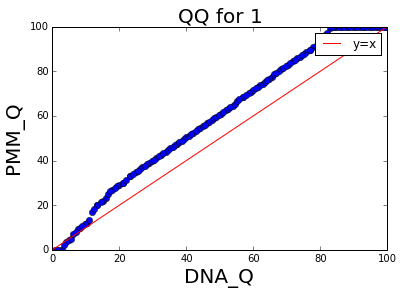

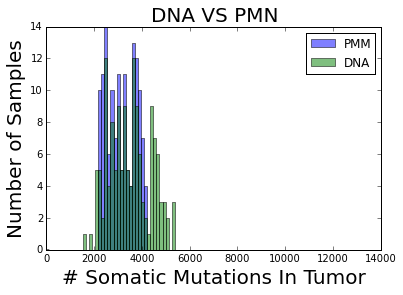

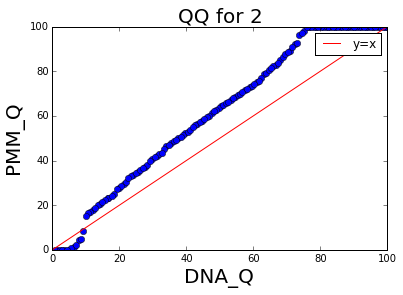

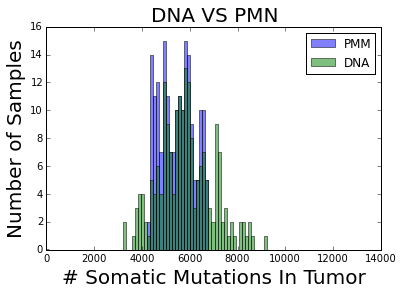

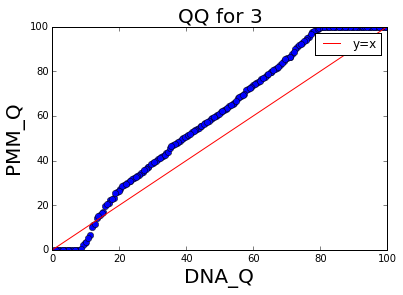

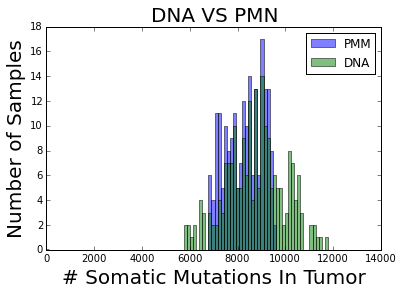

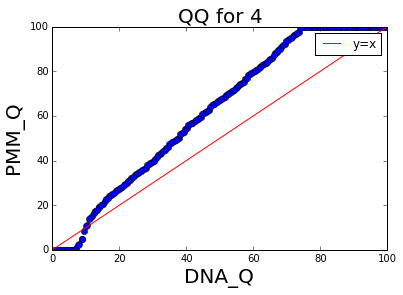

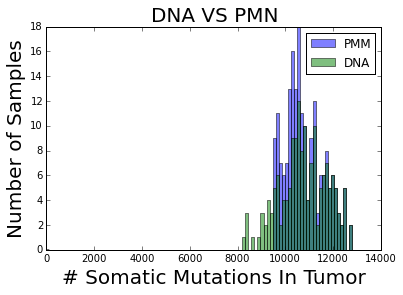

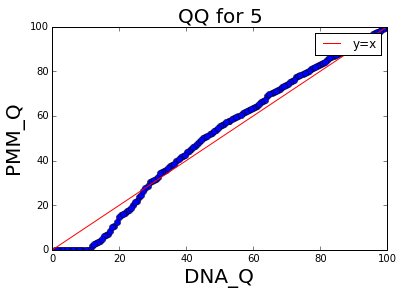

Number agreements  736
Total  963
Prob agreements  0.174861355081
Cohen kappa  0.714324732622
Initial Lambda is  [1053.0, 2267.5, 3962.5, 5632.0, 7433.0, 9036.5, 10439.75]
Initial p_k is [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
ll_new is  -47008.6835432 missing is  30
ll_new is  -45643.558934 missing is  24
ll_new is  -44869.9925877 missing is  23
ll_new is  -60548.4131884 missing is  0
ll_new is  -56285.2941128 missing is  0
ll_new is  -53563.4688951 missing is  0
ll_new is  -51772.1656208 missing is  0
ll_new is  -49653.7495671 missing is  0
ll_new is  -48648.5933415 missing is  0
ll_new is  -48230.0734983 missing is  0
ll_new is  -47983.6428946 missing is  0
ll_new is  -47727.0967962 missing is  0
ll_new is  -47656.6371448 missing is  0
ll_new is  -47580.1610563 missing is  0
ll_new is  -47492.8438997 missing is  0
ll_new is  -47428.6218094 missing is  0
ll_new is  -47321.38532

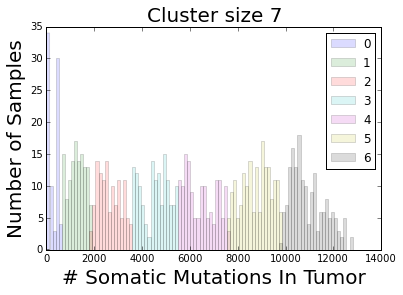

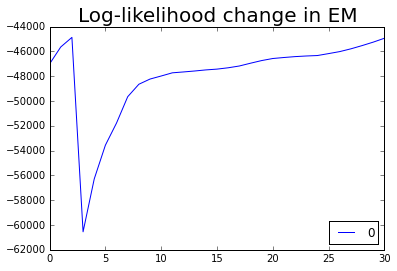

No missing patients in clusters
cfirst lasses are  [0, 1, 2, 3, 4, 5, 6] clusterToPatient is  [0, 1, 2, 3, 4, 5, 6]
Class is  [0, 1, 2, 3, 4, 5, 6] Keys are  [0, 1, 2, 3, 4, 5, 6]
In partition stats Class is  [0, 1, 2, 3, 4, 5, 6] Keys are  [0, 1, 2, 3, 4, 5, 6]


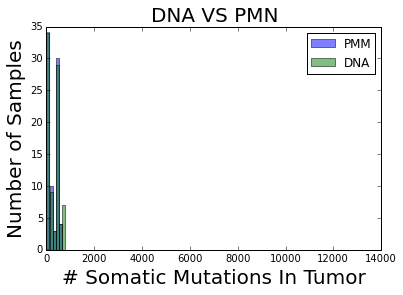

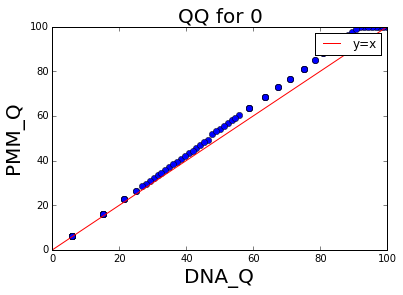

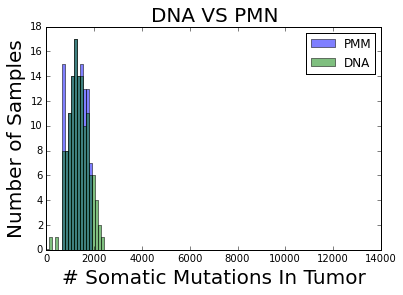

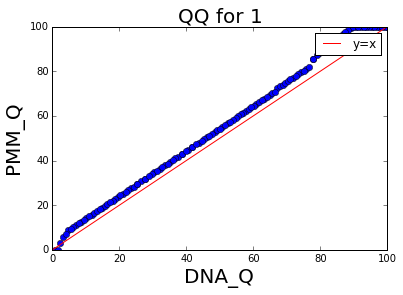

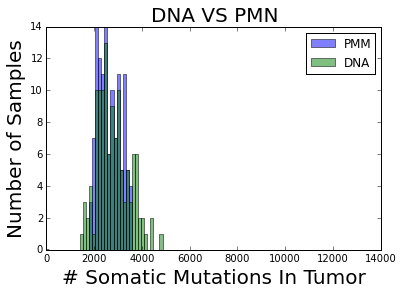

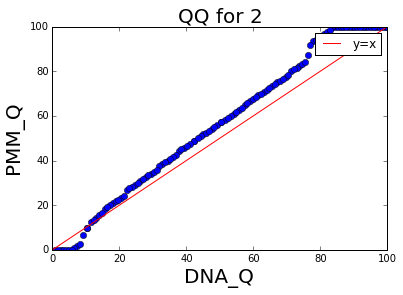

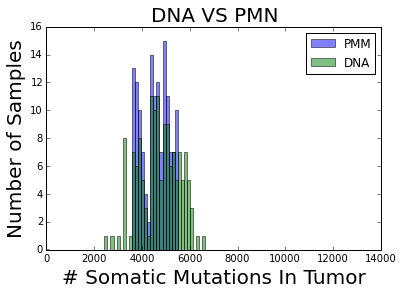

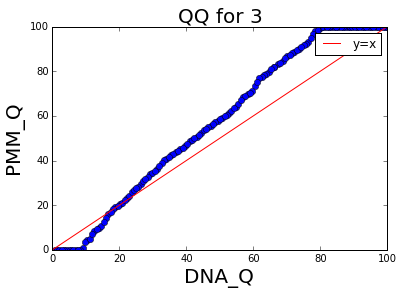

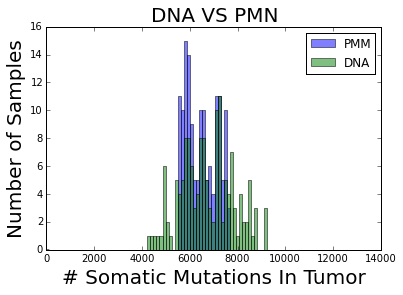

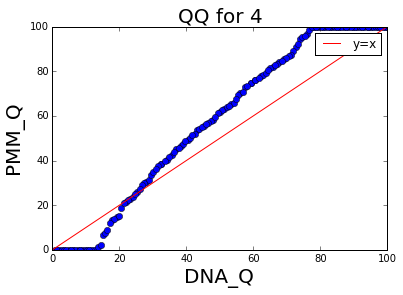

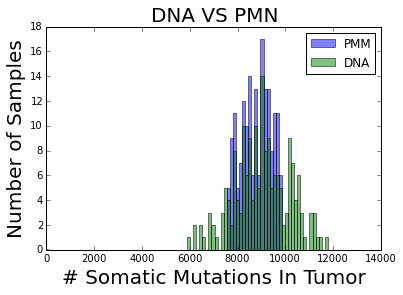

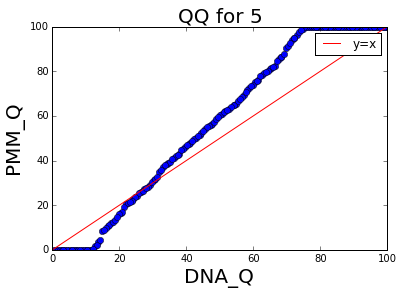

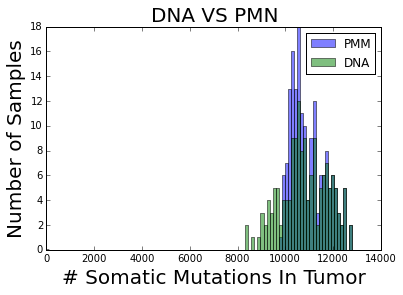

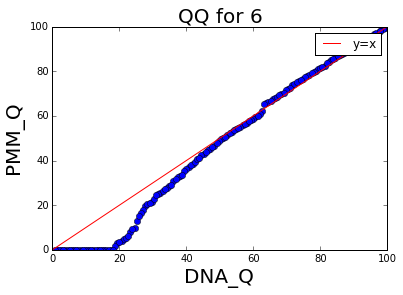

Number agreements  727
Total  963
Prob agreements  0.149032370071
Cohen kappa  0.712013138004
Initial Lambda is  [953.11111111111109, 2001.8888888888887, 3413.3333333333344, 4921.6666666666661, 6339.333333333333, 8020.666666666667, 9289.7777777777774, 10556.111111111111]
Initial p_k is [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
ll_new is  -41189.8468443 missing is  27
ll_new is  -39534.0209413 missing is  22
ll_new is  -52795.7940719 missing is  0
ll_new is  -47941.0223214 missing is  0
ll_new is  -45123.5390122 missing is  0
ll_new is  -43715.887733 missing is  0
ll_new is  -43051.3350994 missing is  0
ll_new is  -42374.2126405 missing is  0
ll_new is  -41550.8246518 missing is  0
ll_new is  -40496.74158 missing is  0
ll_new is  -39402.5805766 missing is  0
ll_new is  -38793.9027122 missing is  0
ll_new is  -38565.6412159 missing is  0
ll_new is  -38463.9339701 missing is  0
ll_new is  -38418.4207898 missing is  0
ll_new is  -38387.0410477 missing is  0
ll_new is  -38368

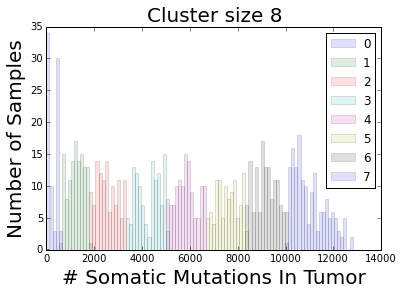

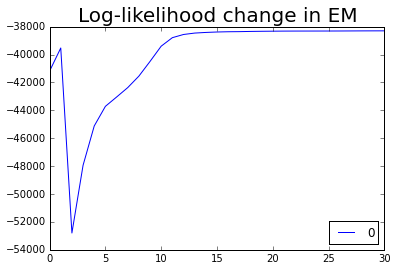

No missing patients in clusters
cfirst lasses are  [0, 1, 2, 3, 4, 5, 6, 7] clusterToPatient is  [0, 1, 2, 3, 4, 5, 6, 7]
Class is  [0, 1, 2, 3, 4, 5, 6, 7] Keys are  [0, 1, 2, 3, 4, 5, 6, 7]
In partition stats Class is  [0, 1, 2, 3, 4, 5, 6, 7] Keys are  [0, 1, 2, 3, 4, 5, 6, 7]


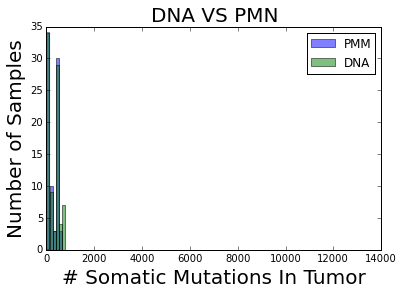

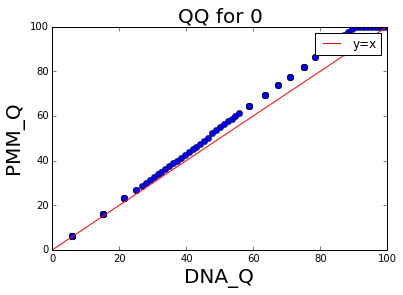

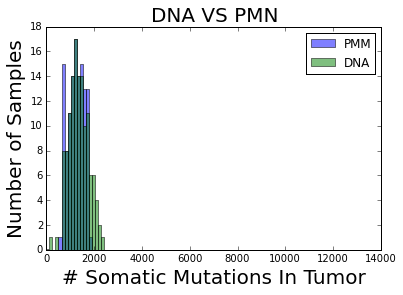

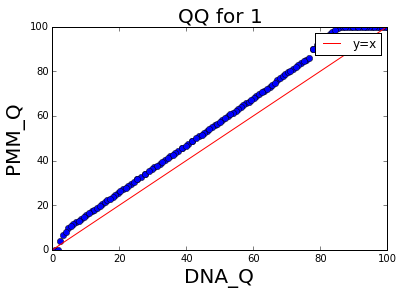

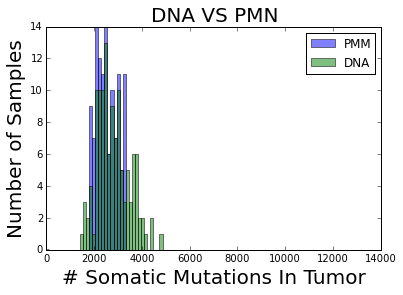

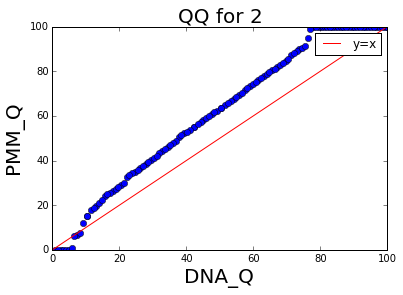

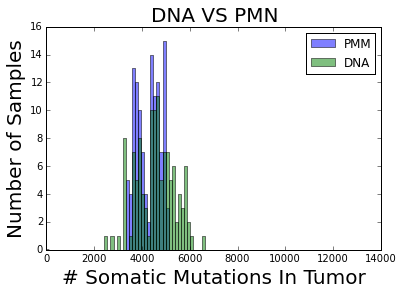

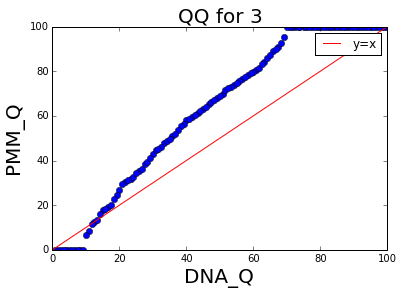

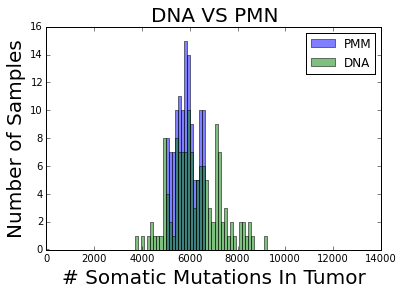

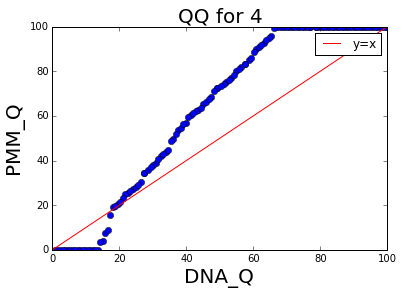

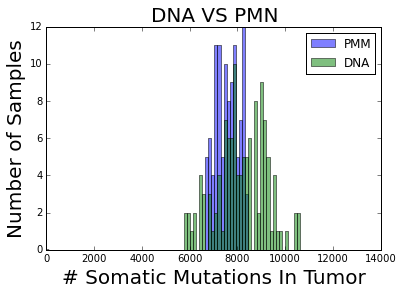

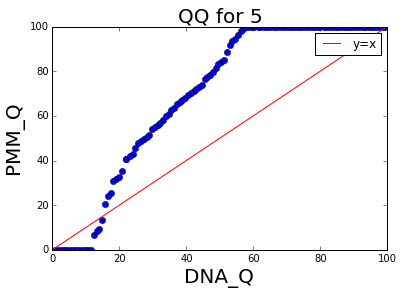

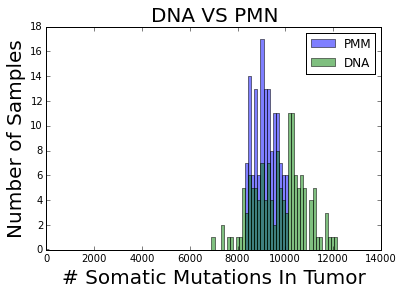

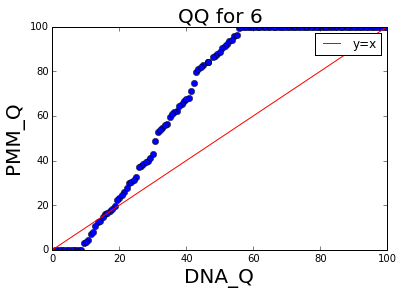

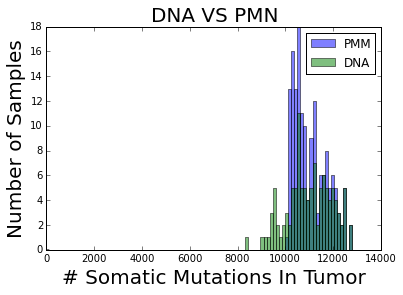

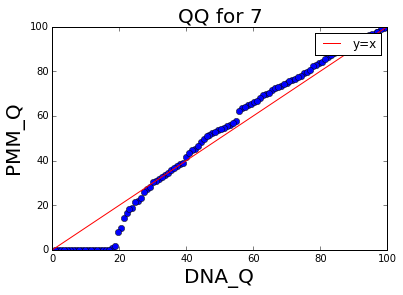

Number agreements  634
Total  963
Prob agreements  0.126569898282
Cohen kappa  0.608851692362
Initial Lambda is  [791.20000000000005, 1674.8000000000002, 2891.5999999999981, 4454.8000000000002, 5632.0, 7055.3999999999996, 8456.7999999999993, 9510.4000000000015, 10653.400000000001]
Initial p_k is [0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]
ll_new is  -36650.4742274 missing is  23
ll_new is  -45679.6235837 missing is  0
ll_new is  -39656.0638866 missing is  0
ll_new is  -37663.739511 missing is  0
ll_new is  -36429.4422677 missing is  0
ll_new is  -35734.9779586 missing is  0
ll_new is  -35317.3544317 missing is  0
ll_new is  -35193.3809355 missing is  0
ll_new is  -35061.3198332 missing is  0
ll_new is  -34993.4175106 missing is  0
ll_new is  -34922.3780306 missing is  0
ll_new is  -34874.0995582 missing is  0
ll_new is  -34848.2730281 missing is  0
ll

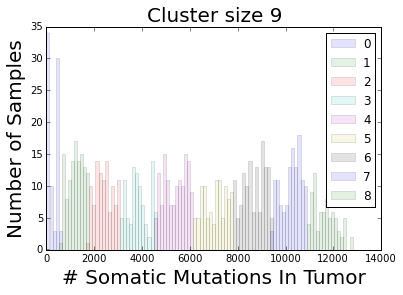

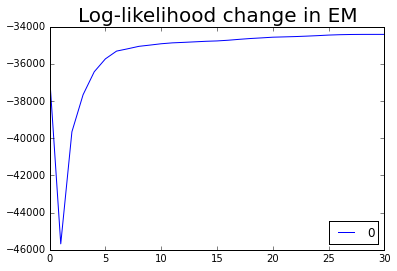

No missing patients in clusters
cfirst lasses are  [0, 1, 2, 3, 4, 5, 6, 7, 8] clusterToPatient is  [0, 1, 2, 3, 4, 5, 6, 7, 8]
Class is  [0, 1, 2, 3, 4, 5, 6, 7, 8] Keys are  [0, 1, 2, 3, 4, 5, 6, 7, 8]
In partition stats Class is  [0, 1, 2, 3, 4, 5, 6, 7, 8] Keys are  [0, 1, 2, 3, 4, 5, 6, 7, 8]


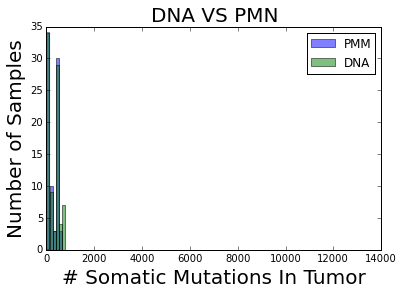

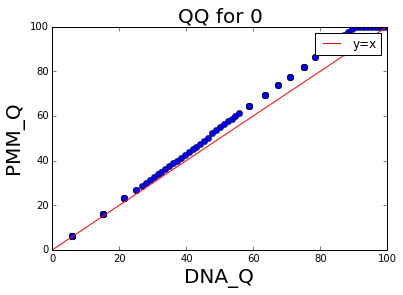

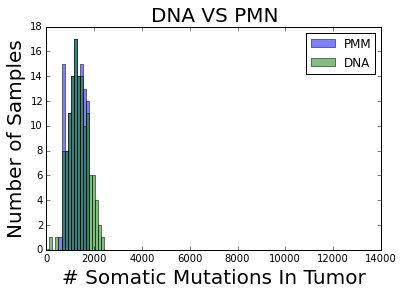

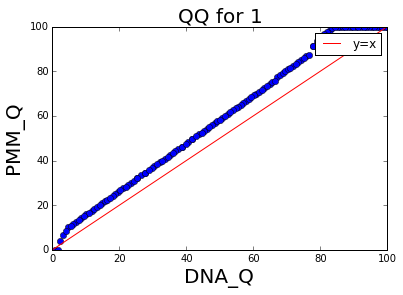

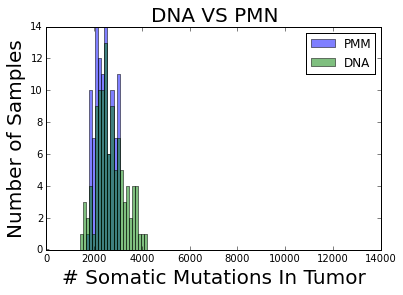

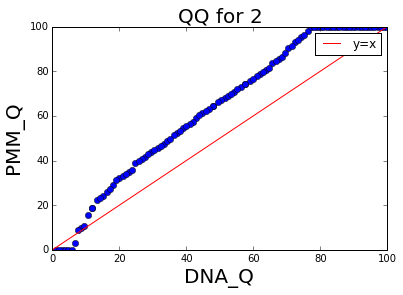

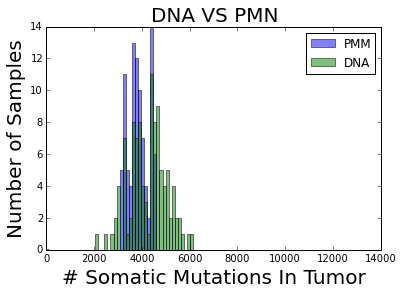

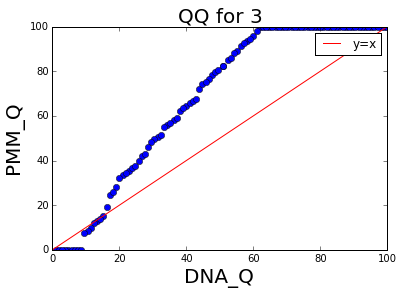

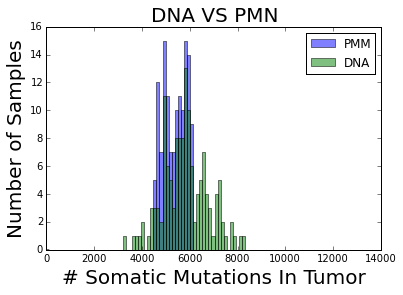

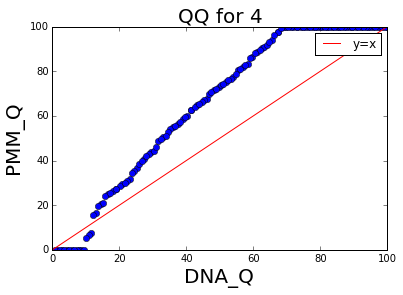

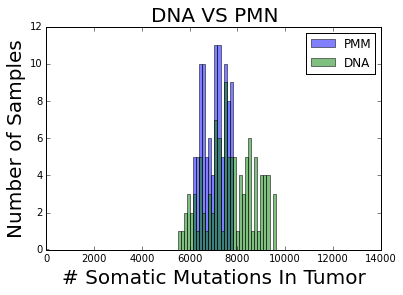

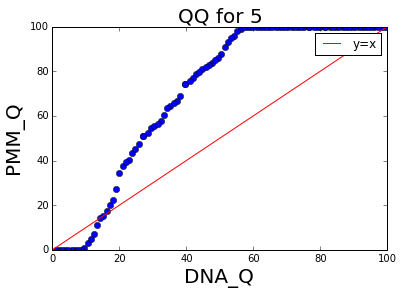

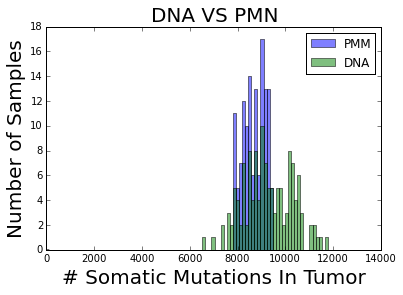

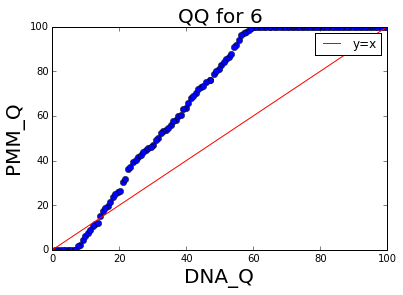

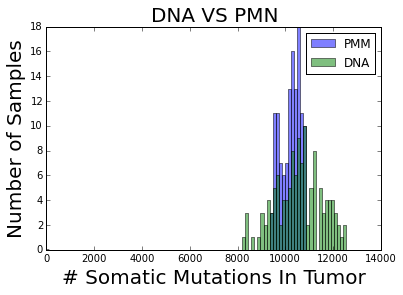

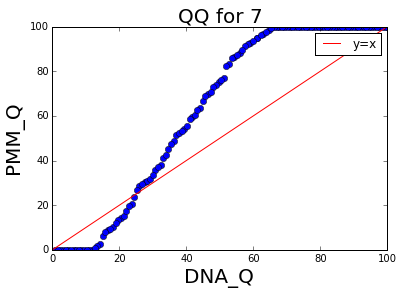

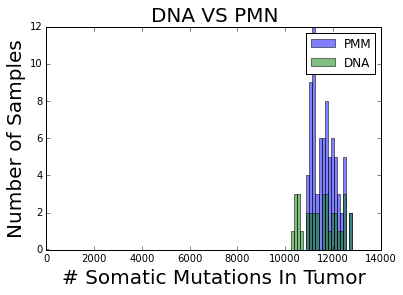

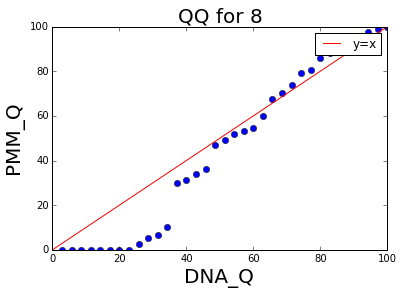

Number agreements  613
Total  963
Prob agreements  0.116409972729
Cohen kappa  0.588669463788
(OrderedDict([('Initial Means', array([   791.2,   1674.8,   2891.6,   4454.8,   5632. ,   7055.4,
         8456.8,   9510.4,  10653.4])), ('Initial p_k', array([ 0.11,  0.11,  0.11,  0.11,  0.11,  0.11,  0.11,  0.11,  0.11])), ('Initial LL', -36650.0), ('Number', 9), ('OriginalNumber', 9), ('Means', [243.5, 1218.8, 2409.5, 3825.4000000000001, 5355.5, 7030.3000000000002, 8665.2000000000007, 10194.1, 11650.9]), ('Probabilities', [0.080000000000000002, 0.12, 0.11, 0.089999999999999997, 0.14000000000000001, 0.10000000000000001, 0.14000000000000001, 0.13, 0.080000000000000002]), ('Likelihood', -34418.0), ('Classes', [0, 1, 2, 3, 4, 5, 6, 7, 8]), ('AIC', 68872.0), ('BIC', 68960.0), ('Missing', 0), ('MinClusterSize', 77), ('MoreThanMin', 1), ('Merged', False), ('MergeHistory', set([])), ('IsFirst', True), ('CohenKappa', 0.5886694637875359)]), OrderedDict([('Initial Means', array([   953.1,   2001.9,

In [131]:
#BRCA RUNS
run_partitions(mutationmatrix = '/Users/jlu96/maf/new/BRCA_wustl/BRCA_wustl-cna-jl.m2',
               do_cross_val=False, rand_num = 0, far_rand_num = 0, minComp=2, maxComp=10,
              min_cluster_size=30, do_pmm_dna=True)
#run_partitions(mutationmatrix = '/Users/jlu96/maf/new/BRCA_wustl/BRCA_wustl-cna-jl.m2', kf_num_folds = 5)
#run_partitions(mutationmatrix = '/Users/jlu96/maf/new/BRCA_wustl/BRCA_wustl-cna-jl.m2', kf_num_folds = 10)

In [ ]:
#BRCA RUNS: HIGHER THRESHOLD!
run_partitions(mutationmatrix = '/Users/jlu96/maf/new/BRCA_wustl/BRCA_wustl-cna-jl.m2',
               do_cross_val=False, rand_num = 3, far_rand_num = 3, minComp=3, maxComp=10,
              min_cluster_size=100, do_pmm_dna=False)



Initial Lambda is  [2267.5, 5632.0, 9036.5]
Initial p_k is [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:750: RuntimeWarning: divide by zero encountered in log


ll_new is  -121346.938124 missing is  87
ll_new is  -111277.133246 missing is  79
ll_new is  -112305.673434 missing is  75
ll_new is  -124942.572127 missing is  57
ll_new is  -130224.97208 missing is  47
ll_new is  -129917.158019 missing is  46
ll_new is  -130269.883573 missing is  45


In [3]:


# check the partition file
num_components = # set this

run(mutationmatrix = '/Users/jlu96/maf/new/BRCA_wustl/BRCA_wustl-cna-jl.m2', 
    do_cross_val = False,
   minComp=num_components,
    maxComp=num_components + 1
   )





ERROR: File `u'().py'` not found.


In [2]:
__author__ = 'jlu96'
import mutex as mex
import matplotlib.pyplot as plt
import csv
import numpy as np
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.cross_validation import KFold
from scipy.stats import poisson
from scipy import stats
import collections
import os

def partition_EM(patientToGenes, k):
    """
    :param geneToCases:
    :param patientToGenes:
    :param k: Number of partitions
    :return: cohort_list
    """

    # partition the patients, and intersect the geneToCases
    return



def partition_gene(patientToGenes, genes):
    """
    :param geneToCases:
    :param patientToGenes:
    :param genes:
    :return: cohorts by each gene. Size 2^(#genes)
    """

    cohorts = [patientToGenes.keys()]
    for gene in genes:
        new_cohorts = []
        for cohort in cohorts:
            new_cohort_1 = [patient for patient in patientToGenes if gene not in patientToGenes[patient]]
            if new_cohort_1:
                new_cohorts.append(new_cohort_1)
            new_cohort_2 = list(set(cohort).difference(set(new_cohort_1)))
            if new_cohort_2:
                new_cohorts.append(new_cohort_2)
        cohorts = new_cohorts
    # print genes
    # print cohorts

    return cohorts

def partition_gene_list(patientToGenes, genes, binary=True):
    """
    :param patientToGenes:
    :param genes:
    :return: The cohorts, ordered from least to greatest in number of those genes they have.
    If binary = True, return just those with, those without.

    """



    gene_set = set(genes)
    cohort_dict = {}

    for patient in patientToGenes:
        num = len(set.intersection(gene_set, patientToGenes[patient]))

        # just 0 and 1
        if binary:
            if num > 0:
                num = 1

        if num not in cohort_dict:
            cohort_dict[num] = []
        cohort_dict[num].append(patient)


    return cohort_dict


def get_patients_gene_mut_num(patients, genes, patientToGenes):
    return [set.intersection(patientToGenes[p], genes) for p in patients]

def integrate_cohorts(cohort_dict, numCases, num_integrated):
    cohorts_int = {}
    start_index = 0
    num_in_cohort = 0
    new_cohort = []
    for i in cohort_dict.keys():
        num_in_cohort += len(cohort_dict[i])
        new_cohort.extend(cohort_dict[i])
        if (num_in_cohort > numCases/num_integrated):
            cohorts_int[start_index] = new_cohort
            start_index = i+1
            new_cohort = []
            num_in_cohort = 0

    if new_cohort:
        cohorts_int[start_index] = new_cohort

    return cohorts_int

def integrate_cohorts_sizes(cohort_dict, sizes):
    cohorts_int = {}
    size_index = 0
    num_in_cohort = 0
    new_cohort = []
    for i in cohort_dict.keys():
        num_in_cohort += len(cohort_dict[i])
        new_cohort.extend(cohort_dict[i])
        if (num_in_cohort > sizes[size_index]):
            cohorts_int[size_index] = new_cohort
            size_index += 1
            new_cohort = []
            num_in_cohort = 0

    if new_cohort:
        cohorts_int[size_index] = new_cohort

    return cohorts_int


def draw_partitions_cohorts(geneToCases, patientToGenes, cohort_pairings, title=None, num_bins=50):
    # LEFT OF HERE, JLU. Finish this, then above. Make plots in parallel, compare.
    # Work with: TP53? Others?

    numGenes = len(geneToCases.keys())
    numCohorts = len(cohort_pairings)

    cohort_frequencies = [[len(patientToGenes[case]) for case in cohort_pair[1]] for cohort_pair in cohort_pairings]
    cohort_names = [cohort_pair[0] for cohort_pair in cohort_pairings]

    draw_partitions(patientToGenes, cohort_names, cohort_frequencies, title=title, num_bins=num_bins)


def draw_partitions(patientToGenes, cohort_names, cohort_frequencies, title=None, num_bins=50):

    numCohorts = len(cohort_frequencies)
    bins = range(0, max([len(p_gene) for p_gene in patientToGenes.values()]), max([len(p_gene) for p_gene in patientToGenes.values()])/num_bins)

    plt.figure()


    for i in range(len(cohort_frequencies)):
        plt.hist(cohort_frequencies[i], bins, alpha=1.0/numCohorts, label=str(cohort_names[i]))


    plt.title(title, fontsize=20)
    plt.xlabel('# Somatic Mutations In Tumor', fontsize=20)
    plt.ylabel('Number of Samples', fontsize=20)
    plt.legend()
    plt.show()

def norm(x, height, center, std):
    return(height*np.exp(-(x - center)**2/(2*std**2)))



def partition_GMM(patientToGenes, num_components, num_bins, title=None, do_plot=True):
    g = mixture.GMM(n_components=num_components)
    mut_num_list = [len(patientToGenes[p]) for p in patientToGenes]
    obs = np.array([[entry] for entry in mut_num_list])
    g.fit(obs)

    print "***********************************"
    print "COMPONENTS: ", num_components
    print "Weights: " + str(np.round(g.weights_,2))
    print "Means: " + str(np.round(g.means_,2))
    print "Covariates: " + str(np.round(g.covars_,2))

    print "Total log probability: " + str(sum(g.score(obs)))
    print "AIC: " + str(g.aic(obs))
    print "BIC: ", g.bic(obs)

    score, respon = g.score_samples(obs)

    for i in range(num_components):
        print "Model ", np.round(g.means_, 2)[i], " explains ", np.round(len([in_w for in_w in respon if in_w[i] == max(in_w)])) * 1.0 /len(respon)


    # Simulate gaussians
    # sim_samples = g.sample(len(patientToGenes))
    bins = range(0, max([len(p_gene) for p_gene in patientToGenes.values()]), max([len(p_gene) for p_gene in patientToGenes.values()])/num_bins)
    histogram = np.histogram([len(patientToGenes[p]) for p in patientToGenes], bins=bins)

    # get the scale of the gaussians from the biggest one
    # max_comp = g.weights_.index(max(g.weights_))
    # max_mean = g.means_[max_comp]

    which_bins = [[bin for bin in bins if bin > mean][0] for mean in g.means_]
    print which_bins
    print bins
    print histogram
    print bins.index(which_bins[0]) - 1
    bin_heights = [histogram[0][bins.index(which_bin) - 1] for which_bin in which_bins]
    # max_height = max(histogram)

    if do_plot:
        plt.figure()
        plt.hist([len(patientToGenes[p]) for p in patientToGenes], bins=bins)
        for i in range(num_components):
            X = np.arange(0, max(mut_num_list), 1)
            Y = norm(X, bin_heights[i], g.means_[i], np.sqrt(g.covars_[i]))
            plt.plot(X, Y, label=str(np.round(g.weights_[i], 3)), linewidth=5)
        plt.title("GMM size " + str(num_components), fontsize=20)
        plt.xlabel('# Somatic Mutations In Tumor', fontsize=20)
        plt.ylabel('Number of Samples', fontsize=20)
        plt.legend()
        plt.show()
        # draw_partitions(patientToGenes, ['Original', 'Simulated'], [[len(patientToGenes[p]) for p in patientToGenes], sim_samples],
        #                 num_bins=num_bins, title=title)

    data = {}
    data['Components'] = num_components
    data['Weights'] = np.round(g.weights_,2)
    data['Means'] = np.round(g.means_,2)
    # data['Covariates'] = np.round(g.covars_,2)
    # data["Total log probability"] = sum(g.score(obs))
    data["AIC"] = g.aic(obs)
    data["BIC"] = g.bic(obs)
    data['Explained'] = [np.round([len([in_w for in_w in respon if in_w[i] == max(in_w)]) * 1.0 /len(respon) for i in range(num_components)], 2)]

    return data

def partition_gene_kmeans(geneToCases, patientToGenes, gene_list, num_components, num_bins, title=None, do_plot=True):

    # get gene index mapping
    giv = getgiv(geneToCases.keys(), gene_list)

    # convert patients into vectors
    patientToVector = getpatientToVector(patientToGenes, giv)

    vectors = patientToVector.values()

    print vectors[0]
    print "Length of vectors is ", len(vectors[0])

    km = KMeans(num_components)

    km.fit(vectors)

    clusterToPatient = {}

    for patient in patientToVector:
        cluster = km.predict(patientToVector[patient])[0]
        if cluster not in clusterToPatient:
            clusterToPatient[cluster] = set()
        clusterToPatient[cluster].add(patient)

    # plot patients in each cluster


    if do_plot:
        bins = range(0, max([len(p_gene) for p_gene in patientToGenes.values()]), max([len(p_gene) for p_gene in patientToGenes.values()])/num_bins)
        plt.figure()
        for cluster in clusterToPatient:
            plt.hist([len(patientToGenes[p]) for p in clusterToPatient[cluster]], bins=bins, label=str(cluster), alpha = 1.0/num_components)
        plt.xlabel('# Somatic Mutations In Tumor', fontsize=20)
        plt.ylabel('Number of Samples', fontsize=20)
        plt.legend()
        plt.title("Kmeans size " + str(num_components), fontsize=20)
        plt.show()



    data = {}
    data['Score'] = km.score(vectors)
    data['Number'] = num_components
    data['% Explained'] = np.round([100 * len(clusterToPatient[cluster]) * 1.0 / len(patientToGenes) for cluster in clusterToPatient], 2)
    data['Vector size'] = len(vectors[0])
    # data['Covariates'] = np.round(g.covars_,2)
    # data["Total log probability"] = sum(g.score(obs))
    # data["AIC"] = g.aic(obs)
    # data["BIC"] = g.bic(obs)
    # data['Explained'] = [np.round([len([in_w for in_w in respon if in_w[i] == max(in_w)]) * 1.0 /len(respon) for i in range(num_components)], 2)]

    return data


def getgiv(all_genes, gene_list):
    """
    :param all_genes:
    :param gene_list:
    :return: A list of the genes in common, the gene_index_vector.
    """
    giv = list(set(all_genes).intersection(set(gene_list)))

    return giv



def getpatientToVector(patientToGenes, gene_index_vector):
    patientToVector = {}
    for patient in patientToGenes:
        patient_genes = patientToGenes[patient]
        patientToVector[patient] = []
        for gene in gene_index_vector:
            patientToVector[patient].append(1 if gene in patient_genes else 0)

    return patientToVector


def get_cluster_gTC_pTG(geneToCases, patientToGenes, patients):
    new_pTG = dict([c for c in patientToGenes.items() if c[0] in patients])
    new_genes = set.union(*new_pTG.values())
    new_gTC = dict([g for g in geneToCases.items() if g[0] in new_genes])
    for g in new_gTC:
        new_gTC[g] = new_gTC[g].intersection(patients)
    
    for g in new_genes:
        if g in new_gTC and not new_gTC[g]:
            new_gTC.pop(g)
    
    new_genes = new_genes.intersection(set(new_gTC.keys()))
    
    return new_genes, new_gTC, new_pTG










# 3/12/16-Jlu


class PMM:

    def __init__(self, filename=None, delimiter='\t', lam=None, p_k=None, classes=None, patientToGenes=None,
                data = None, clusterToPatient = None, do_fit=True):

        if filename:
            with open(filename, 'rU') as csvfile:
                reader = csv.DictReader(csvfile, delimiter=delimiter)
                row = reader.next()
                print row
                self.lam = eval(row['Means'])
                self.p_k = eval(row['Probabilities'])
                self.classes = eval(row['Classes']) if 'Classes' in row else range(len(self.lam))
                self.num_components = len(self.classes)
        else:
            self.lam = lam
            self.p_k = p_k
            self.classes = classes
            if not classes:
                self.classes = range(len(self.lam))
            self.num_components = len(self.classes)


        self.data = data
        self.clusterToPatient = clusterToPatient
        print "Class is ", self.classes, "Keys are ", self.clusterToPatient.keys()

        self.patientToGenes = patientToGenes

        if patientToGenes and do_fit:
            self.fit_to_data(patientToGenes)

    def fit_to_data(self, patientToGenes, min_cluster_size=0):
        self.patientToGenes = patientToGenes
        self.data, self.clusterToPatient = pmm_fit_to_data(patientToGenes, classes=self.classes, lam=self.lam, p_k=self.p_k,
                                                           min_cluster_size=min_cluster_size)
        return self.data, self.clusterToPatient


    def plot_clusters(self, title):
        plot_pmm_clusters(self.patientToGenes, self.clusterToPatient, self.num_components, title=title)


    def write_clusters(self, partition_file):
        with open(partition_file, 'w') as csvfile:
            writer = csv.writer(csvfile)

            writer.writerow(['Likelihood', self.data['Likelihood']])
            writer.writerow(['BIC', self.data['BIC']])
            writer.writerow(['NumComponents', self.data['Number']])
            writer.writerow(['Cluster', 'Lambda', 'Probability', 'Patients'])
            for k in self.clusterToPatient:
                if k != -1:
                    lam = self.data['Means'][k]
                    p_k = self.data['Probabilities'][k]
                else:
                    lam = None
                    p_k = None
                writer.writerow([k, lam, p_k] + list(self.clusterToPatient[k]))

    def compare_dna(self, dna_cohort_dict, do_KS=False):

        partition_stats_list = []

        sizes = [len(self.clusterToPatient[c]) for c in self.clusterToPatient]

        # partition by genes
        dna_cohorts = integrate_cohorts_sizes(dna_cohort_dict, sizes)

        pmm_cluster_list = []
        dna_cluster_list = []
        
        print "In partition stats Class is ", self.classes, "Keys are ", self.clusterToPatient.keys()
        
        for i in range(len(self.classes)):
            partition_stats = collections.OrderedDict()
            partition_stats['Class'] = self.classes[i]
            partition_stats['Mean'] = self.lam[i]
            partition_stats['Probability'] = self.p_k[i]


            partition_stats['PMM_patients'] = self.clusterToPatient[self.classes[i]]
            partition_stats['DNA_patients'] = dna_cohorts[i]

            pmm_cluster_list.append(partition_stats['PMM_patients'])
            dna_cluster_list.append(partition_stats['DNA_patients'])
            
            dna_pmn = [len(self.patientToGenes[p]) for p in partition_stats['DNA_patients']]
            pmm_pmn = [len(self.patientToGenes[p]) for p in partition_stats['PMM_patients']]

            if do_KS:
                poisson_cdf.mu = self.lam[i]
                partition_stats['KS'] = stats.kstest(dna_pmn, poisson_cdf)

            #qq plot of the dna and then the poisson
            poisson_q = get_quantiles(dna_pmn, pmm_pmn)
            dna_q = get_quantiles(dna_pmn, dna_pmn)

            plot_pmm_clusters(self.patientToGenes, {'PMM': partition_stats['PMM_patients'], 'DNA': partition_stats['DNA_patients'] },
                              2, num_bins=100, title='DNA VS PMN')

            plt.figure()
            plt.plot(dna_q, poisson_q, 'bo')
            plt.plot([0, 100], [0,100], 'r-', label = 'y=x')
            plt.title('QQ for ' + str(self.classes[i]), fontsize=20)
            plt.xlabel('DNA_Q', fontsize=20)
            plt.ylabel('PMM_Q', fontsize=20)
            plt.legend()
            plt.show()

            partition_stats_list.append(partition_stats)

        if do_KS:
            self.data['KS_geom_mean'] = mex.prod([partition_stats['KS'][1] for partition_stats in partition_stats_list]) ** (1.0/ len(partition_stats_list))

            print "KS average is ", self.data['KS_geom_mean']
            
        self.data['CohenKappa'] = cohen_kappa(pmm_cluster_list, dna_cluster_list)


        return partition_stats_list



def cohen_kappa(cluster_list_1, cluster_list_2):
    # assume same categories each
    num_agree = 0
    prob_agree = 0
    total = len(set.union(*[set(c) for c in cluster_list_1]))
    
    num_classes = len(cluster_list_1)
    
    cluster_list_1 = [set(c) for c in cluster_list_1]
    cluster_list_2 = [set(c) for c in cluster_list_2]
    
    for k in range(num_classes):
        a = cluster_list_1[k]
        b = cluster_list_2[k]
        num_agree += len(a.intersection(b))
        prob_agree += (len(a) * len(b) * 1.0) / (total ** 2)
    

    obs_agree = num_agree * 1.0 / total
    
    ck = (obs_agree - prob_agree)/(1.0 - prob_agree)
    
    print "Number agreements ", num_agree
    print "Total ", total
    print "Prob agreements ", prob_agree
    print "Cohen kappa ", ck
    
    return ck
        
    
    




def poisson_cdf(x):
    if not hasattr(poisson_cdf, 'mu'):
        poisson_cdf.mu = 0
    print "X is ", x, "and mu is ", poisson_cdf.mu
    return poisson.cdf(x, poisson_cdf.mu)

def get_quantiles(test_dist, base_dist):
    return [stats.percentileofscore(base_dist, t) for t in test_dist]

def assign_missing(clusterToPatient, patientToGenes):
    if -1 not in clusterToPatient:
        print "No missing patients in clusters"
        return clusterToPatient
    missing_patients = clusterToPatient[-1]
    cluster_means = [(sum([len(patientToGenes[p]) for p in clusterToPatient[c]]) * 1.0 /len(clusterToPatient[c]), c) for c in clusterToPatient if c != -1]
    print cluster_means, cluster_means[0][0]
    for patient in missing_patients:
        num = len(patientToGenes[patient])
        correct_cluster = sorted(cluster_means, key=lambda entry: abs(num - entry[0]))[0][1]
        clusterToPatient[correct_cluster].add(patient)
    clusterToPatient.pop(-1)

    return clusterToPatient



def best_pmm(patientToGenes, num_components, max_iter=30, rand_num=5, far_rand_num=5, min_cluster_size=0,
             plot_clusters=True):

    data_record = []
    lls_record = []

    # Do normal
    first_data, lls = partition_pmm(patientToGenes, num_components,  max_iter=max_iter, min_cluster_size=min_cluster_size)

    data_record.append(first_data)
    lls_record.append(lls)

    # Do best rand init
    for i in range(rand_num):
        data, lls = partition_pmm(patientToGenes, num_components, rand_init=True, max_iter=max_iter, min_cluster_size=min_cluster_size,
                                 verbose=False)
        data_record.append(data)
        lls_record.append(lls)

    for i in range(far_rand_num):
        data, lls = partition_pmm(patientToGenes, num_components, far_rand_init=True, max_iter=max_iter, min_cluster_size=min_cluster_size,
                                 verbose=False)
        data_record.append(data)
        lls_record.append(lls)

    combined_record = zip(data_record, lls_record)

    combined_record = sorted(combined_record, key=lambda entry: (-1 * entry[0]['Missing'], entry[0]['Likelihood']), reverse=True)

    data_record, lls_record = zip(*combined_record)

    best_data = data_record[0]

    if (best_data['Likelihood'] > first_data['Likelihood'] + 10):
        print "First data not best!"
        best_data['IsFirst'] = False
    else:
        best_data['IsFirst'] = True


    clusterToPatient = pmm_to_cluster(patientToGenes, best_data['Classes'], best_data['Means'], best_data['Probabilities'])

    if plot_clusters:
        plot_pmm_clusters(patientToGenes, clusterToPatient, num_components)

    plot_likelihoods(lls_record)

    return best_data, clusterToPatient
    # Return clusters


def pmm_to_cluster(patientToGenes, classes, lam, p_k):
    clusterToPatient = {}

    for k in classes:
        clusterToPatient[k] = set()

    clusterToPatient[-1] = set()


    for patient in patientToGenes:
        d = len(patientToGenes[patient])

        max_class = -1
        max_ll = -np.inf
        for k in classes:
            if (np.log(p_k[k]) + np.log(poisson(lam[k]).pmf(d))) > -np.inf:
                if (np.log(p_k[k]) + np.log(poisson(lam[k]).pmf(d))) > max_ll:
                    max_class = k
                    max_ll = (np.log(poisson(lam[k]).pmf(d)))


        clusterToPatient[max_class].add(patient)

    missing_clusters = set()
    for cluster in clusterToPatient:
        if not clusterToPatient[cluster]:
            print '**********NO PATIENTS IN CLUSTER ', lam[cluster], p_k[cluster]
            missing_clusters.add(cluster)
            #clusterToPatient[cluster].add('NO PATIENTS IN CLUSTER')
    for cluster in missing_clusters:
        clusterToPatient.pop(cluster)
            
    return clusterToPatient



def pmm_cross_validate(num_components, patientToGenes, num_folds, kf_random_state=None, max_iter=30, rand_num=5, far_rand_num=5, min_cluster_size=0):
    """
    :return: The average likelihood of the model when applied to a new test set, and its BIC
    """

    kf = KFold(len(patientToGenes), n_folds=num_folds, random_state=kf_random_state)

    lls = []
    missing_patients = []
    bics = []
    for train_index, test_index in kf:

        train_patientToGenes = dict([patientToGenes.items()[x] for x in train_index])
        test_patientToGenes = dict([patientToGenes.items()[x] for x in test_index])
        best_data, _ = best_pmm(train_patientToGenes, num_components, max_iter=max_iter, rand_num=rand_num,
                                               far_rand_num=far_rand_num, min_cluster_size=min_cluster_size)

        test_stats, test_cluster = pmm_fit_to_data(test_patientToGenes, best_data['Classes'], best_data['Means'], best_data['Probabilities'])

        plot_pmm_clusters(test_patientToGenes, test_cluster, num_components, title='Test clusters size ' + str(num_components))

        lls.append(test_stats['Likelihood'])
        missing_patients.append(test_stats['Missing'])
        bics.append(test_stats['BIC'])

    return sum(lls) * 1.0/len(lls), sum(missing_patients) * 1.0 / len(missing_patients), sum(bics) * 1.0/ len(bics)





def pmm_fit_to_data(patientToGenes, classes, lam, p_k, data=None, min_cluster_size=0):
    """
    :param patientToGenes:
    :param lam:
    :param p_k:
    :param data:
    :return: data, clusterToPatient
    """

    if not data:
        data = collections.OrderedDict()


    D = [len(patientToGenes[p]) for p in patientToGenes]
    numCases = len(D)
    num_components = len(lam)

    ll_kd = np.array([ [np.log(p_k[k]) + np.log(poisson(lam[k]).pmf(d)) for d in D] for k in classes])
    likelihood_sums = np.zeros(numCases)

    for i in range(numCases):
        likelihood_sums[i] = sum([(np.exp(ll_kd[k][i]) if ll_kd[k][i] > -np.inf else 0) for k in range(num_components)] )

    # complete log likelihood

    ll = sum(np.log(np.array([ls for ls in likelihood_sums if ls > 0])))

    clusterToPatient = pmm_to_cluster(patientToGenes, classes, lam, p_k)

    print "LL:", np.round(ll), "Missing patients: ", len(clusterToPatient[-1]) if -1 in clusterToPatient else 0

    data['Number'] = num_components
    data['OriginalNumber'] = num_components
    mp = zip(*sorted(zip(list(np.round(lam, 1)), list(np.round(p_k, 2))), key = lambda entry: entry[0]))

    data['Means'], data['Probabilities'] =  list(mp[0]), list(mp[1])   
    data['Likelihood'] = np.round(ll)
    data['Classes'] = classes
    data['AIC'] = np.round(2 * (len(p_k) + len(lam)) - 2 * ll)
    data['BIC'] = np.round(-2 * ll + (len(p_k) + len(lam)) * np.log(numCases))
    data['Missing'] = len(clusterToPatient[-1]) if -1 in clusterToPatient else 0
    data['MinClusterSize'] = min([len(clusterToPatient[c]) if c != -1 else np.inf  for c in clusterToPatient])
    data['MoreThanMin'] = 1 if data['MinClusterSize'] > min_cluster_size else 0
    data['Merged'] = False
    data['MergeHistory'] = set()

    return data, clusterToPatient




def partition_pmm(patientToGenes, num_components, diff_thresh=0.01, num_bins=50, max_iter=100, by_iter=True,
                  rand_init=False, far_rand_init=False, do_plot=False, get_best=True, min_cluster_size=0,
                 verbose=True):


    # get the whole data distribution


    # D = [1,2,3,4,5, 100, 150, 200, 1000]
    D = [len(patientToGenes[p]) for p in patientToGenes]
    numCases = len(D)
    data = collections.OrderedDict()

    # print "D is ", D

    # get the lambdas at equal-spaced intervals


    lam = [np.percentile(D, (i + 1) * 100.0 / (num_components + 1)) for i in range(num_components)]
    p_k = [1.0 / num_components for i in range(num_components)]
    classes = range(num_components)

    if rand_init:
        old_lam = lam
        old_p_k = p_k
        #random sample  in a range centered at the quartiles
        lam = [np.random.uniform(l - 0.5 * old_lam[0], l + 0.5 * old_lam[0]) for l in old_lam]
        rand_freq = [2**np.random.uniform(-1, 1) * pk for pk in old_p_k]
        p_k = list(np.array(rand_freq)/sum(rand_freq))
        classes = range(num_components)

    if far_rand_init:
        lam = [np.random.uniform(min(D), max(D)) for l in lam]
        rand_freq = [np.random.uniform(0, 1) for l in lam]
        p_k = list(np.array(rand_freq)/sum(rand_freq))

    if verbose:
        print "Initial Lambda is ", lam
        print "Initial p_k is", p_k

    data['Initial Means'] = np.round(lam,1)
    data['Initial p_k'] = np.round(p_k, 2)

    ll = -3e100
    num_iter = 0

    # stupid inital values
    p_k_d= np.zeros(num_components)
    lam_prev = np.zeros(num_components)
    p_k_prev = np.zeros(num_components)

    # for the best values
    ll_best = -np.inf
    p_k_best = None
    lam_best = None
    missing_best = numCases

    lls = []

    while 1:


        # We have the log-likelihood of data d and class k in matrix
        #            data 1 data 2 data 3
        # clsss 1   ll_11   ll_12
        # class 2
        ll_kd = np.array([ [np.log(p_k[k]) + np.log(poisson(lam[k]).pmf(d)) for d in D] for k in classes])

        

        # Likelihood_sums: the total likelihood of each data, summed across class k
        likelihood_sums = np.zeros(numCases)

        for i in range(numCases):
            likelihood_sums[i] = sum([(np.exp(ll_kd[k][i]) if ll_kd[k][i] > -np.inf else 0) for k in range(num_components)] )

            
        missing_new = len([x for x in likelihood_sums if x == 0])
        # complete log likelihood

        ll_new = sum(np.log(np.array([ls for ls in likelihood_sums if ls > 0])))

        if num_iter == 0:
            data['Initial LL'] = np.round(ll_new)

        if verbose:
            print "ll_new is ", ll_new, "missing is ", missing_new


        if ll_new > ll_best or missing_new < missing_best:
            ll_best = ll_new
            p_k_best = p_k
            lam_best = lam
            missing_best = missing_new

        # When we break out of the loop, take previous value since it might have jumped out
        if (by_iter):
            if num_iter > max_iter:
                break
            elif abs(ll_new - ll) < diff_thresh:
                break
        else:
            if abs(ll_new - ll) < diff_thresh:

                p_k_d = p_k_d_prev
                lam = lam_prev
                p_k = p_k_prev

            break

        p_k_d_prev = p_k_d
        lam_prev = lam
        p_k_prev = p_k


        # Calculate p_k_d. This is p(data d | class k) * p(class k)/sum(p(data|class i) *p(class i);
        # i.e. prob of this class given this data

        p_k_d = np.zeros(ll_kd.shape)

        for i in range(numCases):
            # Use max class likelihood to divide all the likelihoods by
            max_val = np.amax(ll_kd, axis=0)[i]

            # sum the likekhoods for every class, make this the denominator of probability
            denom = sum([(np.exp(ll_kd[k][i] - max_val) if ll_kd[k][i] > -np.inf else 0) for k in range(num_components)])

            for k in range(num_components):
                p_k_d[k][i] = (np.exp(ll_kd[k][i] - max_val) / denom if ll_kd[k][i] > -np.inf else 0)
                # print "numerator is ", np.exp(ll_kd[k][i] - max), " prob is ", p_k_d[k][i]

        # print "p_k_d is ", p_k_d

        # sum probabilities of each data being each class over all data
        Z_k = p_k_d.sum(axis=1)


        # see derivation

        lam = [sum([p_k_d[k][i] * D[i] for i in range(numCases)]) * 1.0 / Z_k[k] for k in classes]
        p_k = Z_k * 1.0 / numCases

        p_k = p_k/p_k.sum()


        # print "New lambda is ", lam
        # print "New p_k is ", p_k


        ll = ll_new

        lls.append(ll)
        num_iter += 1



    if get_best:
        p_k = p_k_best
        lam = lam_best
        ll = ll_best





    data, clusterToPatient = pmm_fit_to_data(patientToGenes, classes, lam, p_k, data=data, min_cluster_size=min_cluster_size)
    # plot patients in each cluster

    if do_plot:
        plot_pmm_clusters(patientToGenes, clusterToPatient, num_components, num_bins=100)


    # clusterToPatient = pmm_to_cluster(patientToGenes, classes, lam, p_k)

    #
    #
    #
    #
    # data['Number'] = num_components
    # data['Means'] = np.round(lam, 1)
    # data['Probabilities'] = np.round(p_k, 2)
    # data['Likelihood'] = np.round(ll)
    # data['Classes'] = classes
    # data['AIC'] = np.round(2 * (len(p_k) + len(lam)) - 2 * ll)
    # data['BIC'] = np.round(-2 * ll + (len(p_k) + len(lam)) * np.log(numCases))
    # data['Missing'] = len(clusterToPatient[-1]) if -1 in clusterToPatient else 0
    # data['MinClusterSize'] = min([len(clusterToPatient[c]) if c != -1 else np.inf  for c in clusterToPatient])
    # data['MoreThanMin'] = 1 if data['MinClusterSize'] > min_cluster_size else 0

    return data, lls



def sort_data_by_means(data):
    """ Sort in ascending order. Don't need to change cluster labels"""
    data_items = data.items()
    mean_indices = ((i, data['Means'][i]) for i in range(len(data['Means'])))
    mean_indices = sorted(mean_indices, key=lambda entry: min(entry[1]) if isinstance(entry[1], list)
                         else entry[1])
    
    conversion_array = [m[0] for m in mean_indices] # this should map to the correct index now. these are new clusters
    
    new_data = collections.OrderedDict()
    
    for key in data:
        value = data[key]
        if isinstance(value, np.ndarray):
            new_value = np.zeros(len(value))
            for i in range(len(conversion_array)):
                new_value[i] = value[conversion_array[i]]
            new_data[key] = new_value
        if isinstance(value, list):
            new_value = [value[conversion_array[i]] for i in range(len(conversion_array))]
            new_data[key] = new_value
            
        else:
            new_data[key] = value
    
    return new_data
    

def merge_clusters(data, clusterToPatient, patientToGenes,
                  missing_limit=0.5, min_cluster_size=30):
    """Merge adjacent clusters. Choosse to merge those clusters that
    are the most similar, as measured by the likelihood of one within
    another.
    missing_limit is the limit on number of patients that can't
    be explained by one cluster. Clusters will be sorted first
    by those who are below the minimum cluster size,
    less missing patients in their merging
    cluster, then by those that have the highest likelihood
    """
    # get the likelihood of each cluster rel. to other ones
    # only look at adjacent clusters! sort them
    
    data = sort_data_by_means(data)
    
    print "****************************************"
    print "Begin merging."
    # first go forward

    
    classes = data['Classes']
    p_k = data['Probabilities']
    lam = data['Means']
    
    
    all_list = []
    
    for i in range(len(lam) - 1):
        from_index, to_index = i, i + 1
        from_class, to_class = classes[from_index], classes[to_index]
        patients = clusterToPatient[from_class]
        p = [len(patientToGenes[patient]) for patient in patients]
        
        #check if we're dealing with merged clusters. if so... add the likelihoods of the individual
        # underlying poissons?
        if isinstance(p_k[from_index], list):
            clust_probs = p_k[from_index]
            clust_means = lam[from_index]
            clust_size = len(clust_means)
            
            from_ll = [max([np.log(clust_probs[x]) + 
                           np.log(poisson(clust_means[x]).pmf(d)) for x in range(clust_size)])
                          for d in p]
        else:
            from_ll = [np.log(p_k[from_index]) + np.log(poisson(lam[from_index]).pmf(d)) for d in p]
            
        if isinstance(p_k[to_index], list):
            clust_probs = p_k[to_index]
            clust_means = lam[to_index]
            clust_size = len(clust_means)
            
            to_ll = [max([np.log(clust_probs[x]) + 
                           np.log(poisson(clust_means[x]).pmf(d)) for x in range(clust_size)])
                          for d in p]
        else:
            to_ll = [np.log(p_k[to_index]) + np.log(poisson(lam[to_index]).pmf(d)) for d in p]
            
        missing = np.isinf(from_ll) ^ np.isinf(to_ll)
        
        missing_indices = np.where(missing)[0]
        good_indices = np.where(~missing)[0]
        
        missing_num = len(missing_indices)
        
        ll_diffs = [to_ll[j] - from_ll[j] for j in good_indices]
        
        ll_diffs_total = sum(ll_diffs)
        
        all_list.append([(from_index, to_index), missing_num, ll_diffs_total, missing_num > missing_limit * len(p),
                        len(patients) < min_cluster_size])
        
    # now go backwards
    for i in reversed(range(1, len(lam))):
        from_index, to_index = i, i - 1
        from_class, to_class = classes[from_index], classes[to_index]
        patients = clusterToPatient[from_class]
        p = [len(patientToGenes[patient]) for patient in patients]
        
                #check if we're dealing with merged clusters. if so... add the likelihoods of the individual
        # underlying poissons?
        if isinstance(p_k[from_index], list):
            clust_probs = p_k[from_index]
            clust_means = lam[from_index]
            clust_size = len(clust_means)
            
            from_ll = [max([np.log(clust_probs[x]) + 
                           np.log(poisson(clust_means[x]).pmf(d)) for x in range(clust_size)])
                          for d in p]
        else:
            from_ll = [np.log(p_k[from_index]) + np.log(poisson(lam[from_index]).pmf(d)) for d in p]
            
        if isinstance(p_k[to_index], list):
            clust_probs = p_k[to_index]
            clust_means = lam[to_index]
            clust_size = len(clust_means)
            
            to_ll = [max([np.log(clust_probs[x]) + 
                           np.log(poisson(clust_means[x]).pmf(d)) for x in range(clust_size)])
                          for d in p]
        else:
            to_ll = [np.log(p_k[to_index]) + np.log(poisson(lam[to_index]).pmf(d)) for d in p]
        
        
        missing = np.isinf(from_ll) ^ np.isinf(to_ll)
        
        missing_indices = np.where(missing)[0]
        good_indices = np.where(~missing)[0]
        
        missing_num = len(missing_indices)
        
        ll_diffs = [to_ll[j] - from_ll[j] for j in good_indices]
        
        ll_diffs_total = sum(ll_diffs)
        
        
        all_list.append([(from_index, to_index), missing_num, ll_diffs_total, missing_num < missing_limit * len(p),
                        len(patients) < min_cluster_size])
        
    
    # sort by the cluster that's below the min size, then byminimum missing, then by maximum likelihood ratio
    all_list = sorted(all_list, key=lambda entry: (entry[4], entry[3], entry[2]), reverse=True)
    
    print "Possible merged clusters is ", all_list
    print "Best cluster is ", all_list[0]
    

    (from_index, to_index), missing_num, ll_diffs_total, more_than_missing, cluster_too_small = all_list[0]

    # calculate the new AIC, BIC, make new cluster to patient, make new classes..new means? update probabilities
    
    # Record merge history
    new_data = data
    if 'MergeHistory' not in new_data:
        new_data['MergeHistory'] = set()
    
    new_data['MergeHistory'].add((str([lam[from_index], lam[to_index]]),
                  str([p_k[from_index], p_k[to_index]]),
                  (len(clusterToPatient[classes[from_index]]), len(clusterToPatient[classes[to_index]])),
                  missing_num, ll_diffs_total, ('Num classes befpre', len(classes), ('Cluster too small?', cluster_too_small))))
        
    new_clusterToPatient = clusterToPatient
    moved_patients = new_clusterToPatient[classes[from_index]]
    new_clusterToPatient[classes[to_index]] = new_clusterToPatient[classes[to_index]].union(moved_patients)
    new_clusterToPatient.pop(classes[from_index])

    
    print "MERGING the probs and likelihoods"
    if not isinstance(p_k[from_index], list):
        p_k[from_index] = [p_k[from_index]]
        lam[from_index] = [lam[from_index]]
    if not isinstance(p_k[to_index], list):
        p_k[to_index] = [p_k[to_index]]
        lam[to_index] = [lam[to_index]] 
    p_k[to_index].extend(p_k[from_index])
    lam[to_index].extend(lam[from_index])
    new_data['Probabilities'] = p_k
    new_data['Means'] = lam
    
    
    print "MERGING: HERE ARE OLD VALUES", new_data
    #remove all the old values
    new_data['Merged'] = True
    new_data['Number'] -= 1
    for key in new_data:
        value = new_data[key]
        if isinstance(value, np.ndarray):
            value = list(value)
            value = value[0: from_index] + value[from_index + 1 :]
            value = np.array(value)
            new_data[key] = value
        elif isinstance(value, list):
            value = value[0: from_index] + value[from_index + 1 :]
            new_data[key] = value

    print "New classe:", new_data['Classes'], "VS NEW KEYS", new_clusterToPatient.keys()
            
    # integrate the old patients to the new ones

    
    
    new_data['MinClusterSize'] = min(len(new_clusterToPatient[c]) for c in new_clusterToPatient)
    
    print "MERGING: HERE ARE NEW VALUES", new_data
    
    plot_pmm_clusters(patientToGenes, clusterToPatient, new_data['Number'], title='Merging')
    
    print "End merging."
    print "****************************************"    
    
    return new_data, new_clusterToPatient
 
    
#     data['Number'] = num_components
#     data['Means'], data['Probabilities'] = zip(*sorted(zip(list(np.round(lam, 1)), list(np.round(p_k, 2))), key = lambda entry: entry[0]))
#     data['Likelihood'] = np.round(ll)
#     data['Classes'] = classes
#     data['AIC'] = np.round(2 * (len(p_k) + len(lam)) - 2 * ll)
#     data['BIC'] = np.round(-2 * ll + (len(p_k) + len(lam)) * np.log(numCases))
#     data['Missing'] = len(clusterToPatient[-1]) if -1 in clusterToPatient else 0
#     data['MinClusterSize'] = min([len(clusterToPatient[c]) if c != -1 else np.inf  for c in clusterToPatient])
#     data['MoreThanMin'] = 1 if data['MinClusterSize'] > min_cluster_size else 0

def backward_selection(data, clusterToPatient, patientToGenes, min_cluster_size = 30,
                       max_components = 10):
    """Merge clusters until a criterion is satisfied. Missing patients are assumed to
    be assigned already.
    """
    

    merged_data = data
    merged_cluster = clusterToPatient
    
    while (merged_data['Number'] > max_components or merged_data['MinClusterSize'] < min_cluster_size):
        merged_data, merged_cluster = merge_clusters(merged_data, merged_cluster, patientToGenes,
                                                    min_cluster_size = min_cluster_size)
    
    return merged_data, merged_cluster
    







def plot_pmm_clusters(patientToGenes, clusterToPatient, num_components, num_bins=100, title=None):
    D = [len(patientToGenes[p]) for p in patientToGenes]

    bins = range(0, max(list(D)), max(list(D))/num_bins)
    plt.figure()
    for cluster in clusterToPatient:
        plt.hist([len(patientToGenes[p]) for p in clusterToPatient[cluster]], bins=bins, label=str(cluster), alpha = 1.0/num_components)
    plt.xlabel('# Somatic Mutations In Tumor', fontsize=20)
    plt.ylabel('Number of Samples', fontsize=20)
    plt.legend()
    if not title:
        plt.title("Cluster size " + str(num_components), fontsize=20)
    else:
        plt.title(title, fontsize=20)
    plt.show()

def plot_likelihoods(ll_record):
    plt.figure()
    for i in range(len(ll_record)):
        plt.plot(ll_record[i], label=str(i))
    plt.title("Log-likelihood change in EM", fontsize=20)
    plt.legend(loc=4)
    plt.show()

# If there are any patients that aren't assigned, i.e. in cluster -1
# Throw them out?
def load_patient_cohorts(partitionfile, patientToGenes, add_to_closest=True, delimiter='\t'):
    clusterToProp = {}

    with open(partitionfile, 'rU') as csvfile:
        reader = csv.reader(csvfile, delimiter=delimiter)
        for row in reader:
            if (row[0] == 'Cluster'): break
        # reader = csv.DictReader(csvfile, delimiter=delimiter)
        # print "begun dict reader\n"
        for row in reader:
            c = eval(row[0])
            print c
            clusterToProp[c] = {}
            clusterToProp[c]['Mean'] = eval(row[1]) if row[1] else 0
            clusterToProp[c]['Probability'] = eval(row[2]) if row[2] else 0
            clusterToProp[c]['Patients'] = set(row[3:]) if row[3] else set()


    if -1 in clusterToProp:
        if add_to_closest:
            other_cs = clusterToProp.keys()
            other_cs.remove(-1)
            print "Removed ", clusterToProp[-1]
            for patient in clusterToProp[-1]:
                sims = [(abs(len(patientToGenes[patient]) - clusterToProp[c]['Mean']), c) for c in other_cs]
                sims = sorted(sims, key = lambda entry: entry[0])
                best_c = sims[0][1]
                clusterToProp[best_c]['Patients'].add(patient)
            print "completed"

        clusterToProp.pop(-1)

    sorted_clusters = sorted(clusterToProp.keys(), key = lambda entry: clusterToProp[entry]['Mean'])
    
    oldclusterToProp = clusterToProp.copy()
    clusterToProp = {}
    cohort_dict = {}
    
    for i in range(len(sorted_clusters)):
        cohort_dict[i] = oldclusterToProp[sorted_clusters[i]]['Patients']
        clusterToProp[i] = oldclusterToProp[sorted_clusters[i]]
    
    min_cohort = cohort_dict[0]
    
    
    
    

#     for c in clusterToProp:
#         cohort_dict[c] = clusterToProp[c]['Patients']
#     min_cohort = cohort_dict[sorted(clusterToProp.keys(), key=lambda entry: clusterToProp[entry]['Mean'])[0]]

    return cohort_dict, clusterToProp, min_cohort

# INDEX BY LOSSES
%matplotlib inline
def run_partitions(mutationmatrix = None, #'/Users/jlu96/maf/new/OV_broad/OV_broad-cna-jl.m2',
        patientFile = None, #'/Users/jlu96/maf/new/OV_broad/shared_patients.plst',
        out_file = None, #'/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/OV_broad-cna-jl-PMM-crossval.txt',
        partition_file = None, #'/Users/jlu96/maf/new/OV_broad/OV_broad-cna-jl.ppf',
        load_pmm_file = None, #'/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/OV_broad-cna-jl-PMM.txt',
        dna_pmm_comparison_file = None, #'/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/OV_broad-cna-jl-PMM-dnacomp.txt',
        cluster_matrix = None, # '/Users/jlu96/maf/new/OV_broad/OV_broad-cna-jl-cluster.m2',
        min_cluster_size = 15,
        num_init = 9,
        minComp = 2,
        maxComp = 5,
        do_plot = True,
        do_gmm = False,
        do_dna = False,
        num_integrated = 4,
        do_kmeans = False,
        do_pmm = True,
        do_cross_val = False,
        do_pmm_dna = True,
        do_back_selection = True,
        write_cluster_matrices = True,
        rand_num = 3,
        far_rand_num = 3,
        kf_random_state = 1,
        kf_num_folds = 5,

        geneFile = None,
        minFreq = 0,
        dna_gene_file = '/Users/jlu96/conte/jlu/Analyses/CancerGeneAnalysis/DNADamageRepair_loss.txt',
       out_dir = '/Users/jlu96/conte/jlu/Analyses/CancerMutationDistributions/',
        write_all_partitions = True):
    
    mutationmatrix_list = mutationmatrix.split('/')
    matrix_dir = '/'.join(mutationmatrix_list[:-1]) + '/'
    prefix = (mutationmatrix_list[-1]).split('.m2')[0]
    

    if not patientFile:
        patientFile = matrix_dir + 'shared_patients.plst'
        
    if not out_file:
        if do_cross_val:
            out_file = out_dir + prefix + '-PMM-crossval-kf' + str(kf_num_folds) + '.txt'
        else:
            out_file = out_dir + prefix + '-PMM-comparisons.txt'
    
    if not partition_file:
        partition_file = matrix_dir + prefix + '.ppf'
        
    
    if not load_pmm_file:
        load_pmm_file = out_dir + prefix + '-PMM.txt'
    
    if not dna_pmm_comparison_file:
        dna_pmm_comparison_file = out_dir + prefix + '-PMM-dnacomp.txt'
        
    if not cluster_matrix:
        cluster_matrix = matrix_dir + prefix + '-cluster.m2'

    
    numGenes, numCases, genes, patients, geneToCases, patientToGenes = mex.load_mutation_data(mutationmatrix, patientFile, geneFile, minFreq)

    p_gene_list = []

    with open(dna_gene_file, 'rU') as row_file:
        reader = csv.reader(row_file, delimiter='\t')
        for row in reader:
            p_gene_list.append(row[0])
        dna_cohort_dict = partition_gene_list(patientToGenes, p_gene_list, binary=not bool(num_integrated))


    if do_kmeans:
        datas = []
        for i in np.arange(minComp, maxComp, 1):
            datas.append(partition_gene_kmeans(geneToCases, patientToGenes, p_gene_list, i, num_bins=50, title=None, do_plot=True))

        with open(out_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=datas[0].keys())
            writer.writeheader()
            for row in datas:
                writer.writerow(row)


    if do_dna:
        cohort_dict = partition_gene_list(patientToGenes, p_gene_list, binary=not bool(num_integrated))
        # Make new cohorts over this
        if num_integrated:
            cohort_dict = integrate_cohorts(cohort_dict, numCases, num_integrated)


        cohort_pairings = [(key, cohort_dict[key]) for key in cohort_dict]
        draw_partitions_cohorts(geneToCases, patientToGenes, cohort_pairings, title='DNADamageGenes',
                        num_bins=100 if mutationmatrix[-9:] == 'cna-jl.m2' else 50)


    if do_gmm:
        datas = []
        for i in np.arange(minComp, maxComp, 1):
            datas.append(partition_GMM(patientToGenes, i, num_bins=50, title='GMM size ' + str(i), do_plot=do_plot))

        with open(out_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=datas[0].keys())
            writer.writeheader()
            for row in datas:
                writer.writerow(row)


    if do_pmm:
        datas = []
        clusters = []

        partition_stats_list = []
        for num_components in np.arange(minComp, maxComp, 1):
            best_data, clusterToPatient = best_pmm(patientToGenes, num_components, rand_num=rand_num, far_rand_num=far_rand_num,
                                                   min_cluster_size=min_cluster_size)

            if do_back_selection:
                # assign the missing data
                clusterToPatient = assign_missing(clusterToPatient, patientToGenes)
                best_data, clusterToPatient = backward_selection(best_data, clusterToPatient, patientToGenes, min_cluster_size = min_cluster_size,
                       max_components = maxComp)
            
            if do_pmm_dna:
                print "cfirst lasses are ", best_data['Classes'], "clusterToPatient is ", clusterToPatient.keys()
                pmm = PMM(lam=best_data['Means'], p_k=best_data['Probabilities'], patientToGenes=patientToGenes,
                         data=best_data, clusterToPatient=clusterToPatient, classes=best_data['Classes'],
                          do_fit=False)

                partition_stats_list.extend(pmm.compare_dna(dna_cohort_dict))

                best_data = pmm.data


            if do_cross_val:
            #cross validate each of the components
                print "*******************************************************************************************************"
                print "BEGINNING CROSS VALIDATION for ", num_components
                print "*******************************************************************************************************"
                best_data['TestLL'], best_data['TestMissing'], best_data['TestBIC'] = pmm_cross_validate(num_components, patientToGenes,
                                                                                                         num_folds=kf_num_folds,
                                                                                                     kf_random_state=kf_random_state,
                                                                                   rand_num=rand_num, far_rand_num=far_rand_num,
                                                                                   min_cluster_size=min_cluster_size)
                best_data['TestFolds'] = kf_num_folds

                print "*******************************************************************************************************"
                print "EMDING CROSS VALIDATION  for ", num_components
                print "*******************************************************************************************************"

            datas.append(best_data)
            clusters.append(clusterToPatient)
            
            if write_all_partitions:
                with open(partition_file + str(num_components), 'w') as csvfile:
                    writer = csv.writer(csvfile, delimiter='\t')

                    writer.writerow(['Likelihood', best_data['Likelihood']])
                    writer.writerow(['BIC', best_data['BIC']])
                    writer.writerow(['NumComponents', best_data['Number']])
                    writer.writerow(['Cluster', 'Mean', 'Probability', 'Patients'])
                    if 'Merged' in best_data and best_data['Merged']:
                        for k in range(len(clusterToPatient)):
                            lam = best_data['Means'][k]
                            p_k = best_data['Probabilities'][k]
                            writer.writerow([best_data['Classes'][k] , lam, p_k]  + list(clusterToPatient[best_data['Classes'][k]]))
                        
                    else:
                        for k in clusterToPatient:
                            if k != -1:
                                lam = best_data['Means'][k]
                                p_k = best_data['Probabilities'][k]
                            else:
                                lam = None
                                p_k = None
                            writer.writerow([k, lam, p_k] + list(clusterToPatient[k]))

        # get the best BIC
        combined = zip(datas, clusters)
        if do_cross_val:
            combined = sorted(combined, key=lambda entry: ( -1 * entry[0]['MoreThanMin'], np.round(entry[0]['TestMissing']), -1 * entry[0]['TestLL'], entry[0]['TestBIC'], entry[0]['BIC']))
        else:
            combined = sorted(combined, key=lambda entry: ( -1 * entry[0]['MoreThanMin'], entry[0]['BIC']))

        datas, clusters = zip(*combined)




        with open(out_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=datas[-1].keys(), delimiter='\t', extrasaction='ignore')
            print datas
            writer.writeheader()
            for row in datas:
                writer.writerow(row)


        best_data = datas[0]
        clusterToPatient = clusters[0]

        # code to parition by best clusters
        with open(partition_file, 'w') as csvfile:
            writer = csv.writer(csvfile, delimiter='\t')

            writer.writerow(['Likelihood', best_data['Likelihood']])
            writer.writerow(['BIC', best_data['BIC']])
            writer.writerow(['NumComponents', best_data['Number']])
            writer.writerow(['Cluster', 'Mean', 'Probability', 'Patients'])
            if 'Merged' in best_data and best_data['Merged']:
                for k in range(len(clusterToPatient)):
                    lam = best_data['Means'][k]
                    p_k = best_data['Probabilities'][k]
                    writer.writerow([best_data['Classes'][k] , lam, p_k]  + list(clusterToPatient[best_data['Classes'][k]]))
                        
            else:
                for k in clusterToPatient:
                    if k != -1:
                        lam = best_data['Means'][k]
                        p_k = best_data['Probabilities'][k]
                    else:
                        lam = None
                        p_k = None
                    writer.writerow([k, lam, p_k] + list(clusterToPatient[k]))

        if write_cluster_matrices:
            for cluster in clusterToPatient:
                with open(cluster_matrix + str(cluster), 'w') as csvfile:
                    writer = csv.writer(csvfile, delimiter='\t')
                    for patient in clusterToPatient[cluster]:
                        writer.writerow('\t'.join([patient] + list(patientToGenes[patient])))


        if do_pmm_dna:
            with open(dna_pmm_comparison_file, 'w') as csvfile:
                writer = csv.DictWriter(csvfile, fieldnames=partition_stats_list[0].keys(), delimiter='\t')
                writer.writeheader()
                print "header written"
                for row in partition_stats_list:
                    writer.writerow(row)


Not importing the Fortran bipartite_edge_swap bindings in permute.py.


In [52]:
a = [(5270.166666666667, 0), (8074.893617021276, 1), (10702.342857142858, 2)]
num = 3
print sorted(a, key=lambda entry: abs(num - entry[0]))

[(5270.166666666667, 0), (8074.893617021276, 1), (10702.342857142858, 2)]


In [73]:
str([3,4,5])

'[3, 4, 5]'

In [91]:
sorted([True, False], reverse=True)

[True, False]